# **Impact Assessment**

### Import processing and prepping libraries

In [1]:
pip install pymysql

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

import psycopg2
import pymysql

import datetime as dt

In [3]:
#import data processing libraries

import os
import pandas as pd
import numpy as np
import math as math
import datetime as dt
from scipy import stats

In [4]:
#import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [5]:
import pandas as pd
import numpy as np
import datetime

import psycopg2
import pymysql

from datetime import timedelta

In [6]:
import pandas as pd

import numpy as np

import seaborn

import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Load the Data

In [8]:
current_refresh = pd.read_excel("/home/jupyter-jackline.ngenia/Limits_refresh_summary_20230109_multiple_products.xlsx")
# current_refresh = current_refresh[['store_number', 'final_21_limit', 'final_7_limit', 'final_1_limit', 'max_global_limit', 'previous_21_limit', 'previous_7_limit', 'previous_1_limit', 'previous_max_global_limit']]

In [9]:
print(current_refresh.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69086 entries, 0 to 69085
Data columns (total 81 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Unnamed: 0                         69086 non-null  int64         
 1   mobile_number                      68919 non-null  object        
 2   store_number                       69086 non-null  int64         
 3   approx_30_days_trx_val             69086 non-null  float64       
 4   most_recent_trx_date_past_30_days  63416 non-null  datetime64[ns]
 5   last_trx_date                      63416 non-null  datetime64[ns]
 6   expected_trx_days                  69086 non-null  int64         
 7   actual_trx_days                    69086 non-null  int64         
 8   page_active_days                   69086 non-null  float64       
 9   inference_col                      69086 non-null  object        
 10  days_since_last_trx               

In [10]:
current_refresh[['final_21_limit', 'final_7_limit', 'final_1_limit']].sum()

final_21_limit     55208400
final_7_limit     206503600
final_1_limit      56201700
dtype: int64

In [11]:
current_refresh[current_refresh['store_number'] == '7234156']

,Unnamed: 0,mobile_number,store_number,approx_30_days_trx_val,most_recent_trx_date_past_30_days,last_trx_date,expected_trx_days,actual_trx_days,page_active_days,inference_col,days_since_last_trx,transacted_last_5_days,weight_till_recency,national_id,idm_recommendation,idm_limit,is_iprs_validated,client_mobile_number,loan_count,loan_status,term_frequency,principal_disbursed,principal_repaid,disbursed_on_date,expected_matured_on_date,closed_on_date,due_date_fixed,days_past_due,bloom_version,loan_repayment_status,src_crdt_score,max_principal_amount,max_loan_disbursement_date,count_good_loans,good_loans_repayment_ratio,num_days_since_last_disbursement,weight_dpd,adjusted_loan_count,due_date_rm_ge_rm_1d,due_date_rm_ge_rm_add_back,rllvr_date_rm_ge_rm_add_back,max_global_limit,previous_max_global_limit,max_limit_diff,limit_factor_21,limit_factor_7,limit_factor_1,idm_factor_21,idm_factor_7,idm_factor_1,trading_consistency_bands,loan_count_bands,new_limit_factor_21,new_limit_factor_7,new_limit_factor_1,weight_good_loans_repayment_ratio,weight_consistency,weight_recency,risk_rules_factor,ultimate_factor_21,ultimate_factor_7,ultimate_factor_1,limit_21_day,limit_7_day,limit_1_day,adjusted_21_limit,adjusted_7_limit,adjusted_1_limit,final_21_limit,final_7_limit,final_1_limit,blacklist_flag,total_final_21_limit,total_final_7_limit,total_final_1_limit,total_max_global_limit,previous_21_limit,previous_7_limit,previous_1_limit,model_version,created_at


In [12]:
# def calc_final_21_limit(df):
    
#     final_21_limit = df['final_21_limit']
#     previous_21_limit = df['previous_21_limit']
    
#     if previous_21_limit == 0:
#         return 0
#     else:
#         return final_21_limit
    

# def calc_final_7_limit(df):
    
#     final_7_limit = df['final_7_limit']
#     previous_7_limit = df['previous_7_limit']
    
#     if previous_7_limit == 0:
#         return 0
#     else:
#         return final_7_limit
    
    
# def calc_final_1_limit(df):
    
#     final_1_limit = df['final_1_limit']
#     previous_1_limit = df['previous_1_limit']
    
#     if previous_1_limit == 0:
#         return 0
#     else:
#         return final_1_limit

In [13]:
# current_refresh['final_21_limit'] = current_refresh.apply(lambda x: calc_final_21_limit(x), axis = 1)
# current_refresh['final_7_limit'] = current_refresh.apply(lambda x: calc_final_7_limit(x), axis = 1)
# current_refresh['final_1_limit'] = current_refresh.apply(lambda x: calc_final_1_limit(x), axis = 1)
# current_refresh["max_global_limit"] = current_refresh[['final_21_limit', 'final_7_limit', 'final_1_limit']].max(axis=1)


# current_refresh[['final_21_limit', 'final_7_limit', 'final_1_limit', 'max_global_limit']].sum()

In [14]:
current_refresh['store_number'] = current_refresh['store_number'].astype(str)

### 2. Check impact on subsequent loan take-ups

In [15]:
host = '157.245.248.249'
port = int(5432)
dbname = 'ubuntu'
user = 'jacklinengenia'
password = 'x3MX&8#!'


def get_query_results_postgres():
    with psycopg2.connect(host = host,
                          port = port,
                          database = dbname,
                          user = user,
                          password = password) as conn:
        sql = 'SELECT * FROM bloomlive.loans_fact_table_materialized_summary_view where principal_disbursed > 0'
        df = pd.read_sql(sql, conn)
        
    return df

    conn.close()
    
if __name__ == "__main__":
    get_query_results_postgres()  

/tmp/ipykernel_41927/834827804.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


In [16]:
df_loans = get_query_results_postgres()

df_loans.head(3)

/tmp/ipykernel_41927/834827804.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


,loan_surrogate_id,loan_mifos_id,bloom_version,client_surrogate_id,client_mifos_id,client_mobile_number,product_surrogate_id,product_mifos_id,loan_officer_surrogate_id,loan_officer_mifos_id,loan_status,loan_account_number,loan_type,transaction_strategy,term_frequency,term_period_frequency,repay_every,principal_amount_proposed,principal_amount,principal_disbursed,principal_repaid,principal_written_off,principal_outstanding,interest_charged,interest_repaid,interest_waived,interest_written_off,interest_outstanding,fee_charges_charged,fee_charges_repaid,fee_charges_waived,fee_charges_written_off,fee_charges_outstanding,penalty_charges_charged,penalty_charges_repaid,penalty_charges_waived,penalty_charges_written_off,penalty_charges_outstanding,total_expected_repayment,total_repayment,total_expected_cost_of_loan,total_cost_of_loan,total_charges_due_at_disbursement,total_waived,total_written_off,total_outstanding,total_overpaid,total_recovered,guarantee_amount,arrears_tolerance_amount,interest_rate_differential,fixed_emi_amount,max_outstanding_loan_balance,accrued_till,submitted_on_date,approved_on_date,expected_disbursed_on_date,disbursed_on_date,expected_matured_on_date,matured_on_date,expected_first_repayment_on_date,closed_on_date,rescheduled_on_date,rejected_on_date,withdrawn_on_date,written_off_on_date,interest_calculated_from_date,interest_recalculated_on,allow_partial_period_interest_calculation,is_floating_interest_rate,sync_disbursement_with_meeting,interest_recalculation_enabled,create_standing_instruction_at_disbursement,is_npa,is_topup,external_id,store_number,counter,model_version,receipt_number,approved_principal,annual_nominal_interest_rate,loan_status_surrogate_id,product_counter,grace_on_arrears_ageing,loan_version,submitted_on_user_id,closed_on_user_id,rescheduled_on_user_id,withdrawn_on_user_id,disbursed_on_user_id,approved_on_user_id,rejected_on_user_id,record_created_on_date,cntrct_id,application_timestamp,src_crdt_score,src_assgnd_crdt_lmt,src_used_crdt_lmit,src_avail_crdt_lmit,credit_limit_balance,src_id_prdct,end_rollvr_dt,dpd_30,dpd_d60,dpd_d90,safaricom_loan_balance,latest_tep_repayment_key,latest_dump_statement_key,latest_dump_repayment_key,safaricom_loan_balance_date
0,4357849,215557,2.000,126951,40822,254720260345,72,3,NaN,NaN,600,000215557,Individual Loan,mifos-standard-strategy,21,Days,21,3200.000,3200.000,3200.000,3200.000,0.000,0.000,291.840,291.840,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3491.840,3491.840,291.840,291.840,0.000,0.000,0.000,0.000,NaN,None,None,None,None,None,None,None,2022-09-22,2022-09-22,2022-09-22,2022-09-22,2022-10-13,2022-10-12,None,2022-10-12,None,None,None,None,None,None,False,None,None,False,None,False,False,None,629666,2.000,"2022-006[2022-09-02, 2022-09-15]",QIM6GAPNES,3200.000,158.514,47,2.000,NaN,6,1,NaN,None,None,1,1.000,NaN,2022-11-30 08:20:38.410603,111400000001245946,2022-09-22 14:54:26,466.000,3200.000,3200.000,0.000,0.000,10003,2022-10-18,2022-11-17,2022-12-17,2023-01-16,0.000,343142.000,7532619.000,1145408.000,2022-10-12 10:41:37
1,4353639,213407,2.000,182516,100446,254714050489,71,2,NaN,NaN,600,000213407,Individual Loan,mifos-standard-strategy,7,Days,7,3100.000,3100.000,3100.000,3100.000,0.000,0.000,96.720,96.720,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3196.720,3196.720,96.720,96.720,0.000,0.000,0.000,0.000,NaN,None,None,None,None,None,None,None,2022-09-18,2022-09-18,2022-09-18,2022-09-18,2022-09-25,2022-09-25,None,2022-09-25,None,None,None,None,None,None,False,None,None,False,None,False,False,None,7582264,3.000,"2022-006[2022-09-02, 2022-09-15]",QII78VD81V,3100.000,162.686,47,3.000,NaN,6,1,NaN,None,None,1,1.000,NaN,2022-11-30 08:20:38.410603,111400000001251244,2022-09-18 22:37:00,427.000,3100.000,3100.000,0.000,0.000,10002,2022-09-28,2022-10-28,2022-11-27,2022-12-27,0.000,326733.000,6651415.000,1093107.000,2022-09-25 22:53:37
2,4350780,219345,2.000,94867,6567,254722459401,71,2,NaN,NaN,600,

In [17]:
#changing the dates column to datetime datatype
df_loans['disbursed_on_date'] = pd.to_datetime(df_loans['disbursed_on_date'])
df_loans['expected_matured_on_date'] = pd.to_datetime(df_loans['expected_matured_on_date'])

In [18]:
df_loans.head()

,loan_surrogate_id,loan_mifos_id,bloom_version,client_surrogate_id,client_mifos_id,client_mobile_number,product_surrogate_id,product_mifos_id,loan_officer_surrogate_id,loan_officer_mifos_id,loan_status,loan_account_number,loan_type,transaction_strategy,term_frequency,term_period_frequency,repay_every,principal_amount_proposed,principal_amount,principal_disbursed,principal_repaid,principal_written_off,principal_outstanding,interest_charged,interest_repaid,interest_waived,interest_written_off,interest_outstanding,fee_charges_charged,fee_charges_repaid,fee_charges_waived,fee_charges_written_off,fee_charges_outstanding,penalty_charges_charged,penalty_charges_repaid,penalty_charges_waived,penalty_charges_written_off,penalty_charges_outstanding,total_expected_repayment,total_repayment,total_expected_cost_of_loan,total_cost_of_loan,total_charges_due_at_disbursement,total_waived,total_written_off,total_outstanding,total_overpaid,total_recovered,guarantee_amount,arrears_tolerance_amount,interest_rate_differential,fixed_emi_amount,max_outstanding_loan_balance,accrued_till,submitted_on_date,approved_on_date,expected_disbursed_on_date,disbursed_on_date,expected_matured_on_date,matured_on_date,expected_first_repayment_on_date,closed_on_date,rescheduled_on_date,rejected_on_date,withdrawn_on_date,written_off_on_date,interest_calculated_from_date,interest_recalculated_on,allow_partial_period_interest_calculation,is_floating_interest_rate,sync_disbursement_with_meeting,interest_recalculation_enabled,create_standing_instruction_at_disbursement,is_npa,is_topup,external_id,store_number,counter,model_version,receipt_number,approved_principal,annual_nominal_interest_rate,loan_status_surrogate_id,product_counter,grace_on_arrears_ageing,loan_version,submitted_on_user_id,closed_on_user_id,rescheduled_on_user_id,withdrawn_on_user_id,disbursed_on_user_id,approved_on_user_id,rejected_on_user_id,record_created_on_date,cntrct_id,application_timestamp,src_crdt_score,src_assgnd_crdt_lmt,src_used_crdt_lmit,src_avail_crdt_lmit,credit_limit_balance,src_id_prdct,end_rollvr_dt,dpd_30,dpd_d60,dpd_d90,safaricom_loan_balance,latest_tep_repayment_key,latest_dump_statement_key,latest_dump_repayment_key,safaricom_loan_balance_date
0,4357849,215557,2.000,126951,40822,254720260345,72,3,NaN,NaN,600,000215557,Individual Loan,mifos-standard-strategy,21,Days,21,3200.000,3200.000,3200.000,3200.000,0.000,0.000,291.840,291.840,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3491.840,3491.840,291.840,291.840,0.000,0.000,0.000,0.000,NaN,None,None,None,None,None,None,None,2022-09-22,2022-09-22,2022-09-22,2022-09-22,2022-10-13,2022-10-12,None,2022-10-12,None,None,None,None,None,None,False,None,None,False,None,False,False,None,629666,2.000,"2022-006[2022-09-02, 2022-09-15]",QIM6GAPNES,3200.000,158.514,47,2.000,NaN,6,1,NaN,None,None,1,1.000,NaN,2022-11-30 08:20:38.410603,111400000001245946,2022-09-22 14:54:26,466.000,3200.000,3200.000,0.000,0.000,10003,2022-10-18,2022-11-17,2022-12-17,2023-01-16,0.000,343142.000,7532619.000,1145408.000,2022-10-12 10:41:37
1,4353639,213407,2.000,182516,100446,254714050489,71,2,NaN,NaN,600,000213407,Individual Loan,mifos-standard-strategy,7,Days,7,3100.000,3100.000,3100.000,3100.000,0.000,0.000,96.720,96.720,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3196.720,3196.720,96.720,96.720,0.000,0.000,0.000,0.000,NaN,None,None,None,None,None,None,None,2022-09-18,2022-09-18,2022-09-18,2022-09-18,2022-09-25,2022-09-25,None,2022-09-25,None,None,None,None,None,None,False,None,None,False,None,False,False,None,7582264,3.000,"2022-006[2022-09-02, 2022-09-15]",QII78VD81V,3100.000,162.686,47,3.000,NaN,6,1,NaN,None,None,1,1.000,NaN,2022-11-30 08:20:38.410603,111400000001251244,2022-09-18 22:37:00,427.000,3100.000,3100.000,0.000,0.000,10002,2022-09-28,2022-10-28,2022-11-27,2022-12-27,0.000,326733.000,6651415.000,1093107.000,2022-09-25 22:53:37
2,4350780,219345,2.000,94867,6567,254722459401,71,2,NaN,NaN,600,

In [19]:
df_loans = df_loans[df_loans['bloom_version'] == 2]

df_loans = df_loans[(df_loans['loan_status'] == 300) | (df_loans['loan_status'] == 600) | (df_loans['loan_status'] == 700)]

df_loans.shape

(264118, 111)

In [20]:
#create due_date fixed column to ensure due date tallies with the term frequency for each loan

df_loans["due_date_fixed"] = df_loans["disbursed_on_date"] + pd.to_timedelta(df_loans["term_frequency"], unit='d')

df_loans['due_date_fixed'] = pd.to_datetime(df_loans['due_date_fixed'])

df_loans.head(2)

,loan_surrogate_id,loan_mifos_id,bloom_version,client_surrogate_id,client_mifos_id,client_mobile_number,product_surrogate_id,product_mifos_id,loan_officer_surrogate_id,loan_officer_mifos_id,loan_status,loan_account_number,loan_type,transaction_strategy,term_frequency,term_period_frequency,repay_every,principal_amount_proposed,principal_amount,principal_disbursed,principal_repaid,principal_written_off,principal_outstanding,interest_charged,interest_repaid,interest_waived,interest_written_off,interest_outstanding,fee_charges_charged,fee_charges_repaid,fee_charges_waived,fee_charges_written_off,fee_charges_outstanding,penalty_charges_charged,penalty_charges_repaid,penalty_charges_waived,penalty_charges_written_off,penalty_charges_outstanding,total_expected_repayment,total_repayment,total_expected_cost_of_loan,total_cost_of_loan,total_charges_due_at_disbursement,total_waived,total_written_off,total_outstanding,total_overpaid,total_recovered,guarantee_amount,arrears_tolerance_amount,interest_rate_differential,fixed_emi_amount,max_outstanding_loan_balance,accrued_till,submitted_on_date,approved_on_date,expected_disbursed_on_date,disbursed_on_date,expected_matured_on_date,matured_on_date,expected_first_repayment_on_date,closed_on_date,rescheduled_on_date,rejected_on_date,withdrawn_on_date,written_off_on_date,interest_calculated_from_date,interest_recalculated_on,allow_partial_period_interest_calculation,is_floating_interest_rate,sync_disbursement_with_meeting,interest_recalculation_enabled,create_standing_instruction_at_disbursement,is_npa,is_topup,external_id,store_number,counter,model_version,receipt_number,approved_principal,annual_nominal_interest_rate,loan_status_surrogate_id,product_counter,grace_on_arrears_ageing,loan_version,submitted_on_user_id,closed_on_user_id,rescheduled_on_user_id,withdrawn_on_user_id,disbursed_on_user_id,approved_on_user_id,rejected_on_user_id,record_created_on_date,cntrct_id,application_timestamp,src_crdt_score,src_assgnd_crdt_lmt,src_used_crdt_lmit,src_avail_crdt_lmit,credit_limit_balance,src_id_prdct,end_rollvr_dt,dpd_30,dpd_d60,dpd_d90,safaricom_loan_balance,latest_tep_repayment_key,latest_dump_statement_key,latest_dump_repayment_key,safaricom_loan_balance_date,due_date_fixed
0,4357849,215557,2.000,126951,40822,254720260345,72,3,NaN,NaN,600,000215557,Individual Loan,mifos-standard-strategy,21,Days,21,3200.000,3200.000,3200.000,3200.000,0.000,0.000,291.840,291.840,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3491.840,3491.840,291.840,291.840,0.000,0.000,0.000,0.000,NaN,None,None,None,None,None,None,None,2022-09-22,2022-09-22,2022-09-22,2022-09-22,2022-10-13,2022-10-12,None,2022-10-12,None,None,None,None,None,None,False,None,None,False,None,False,False,None,629666,2.000,"2022-006[2022-09-02, 2022-09-15]",QIM6GAPNES,3200.000,158.514,47,2.000,NaN,6,1,NaN,None,None,1,1.000,NaN,2022-11-30 08:20:38.410603,111400000001245946,2022-09-22 14:54:26,466.000,3200.000,3200.000,0.000,0.000,10003,2022-10-18,2022-11-17,2022-12-17,2023-01-16,0.000,343142.000,7532619.000,1145408.000,2022-10-12 10:41:37,2022-10-13
1,4353639,213407,2.000,182516,100446,254714050489,71,2,NaN,NaN,600,000213407,Individual Loan,mifos-standard-strategy,7,Days,7,3100.000,3100.000,3100.000,3100.000,0.000,0.000,96.720,96.720,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3196.720,3196.720,96.720,96.720,0.000,0.000,0.000,0.000,NaN,None,None,None,None,None,None,None,2022-09-18,2022-09-18,2022-09-18,2022-09-18,2022-09-25,2022-09-25,None,2022-09-25,None,None,None,None,None,None,False,None,None,False,None,False,False,None,7582264,3.000,"2022-006[2022-09-02, 2022-09-15]",QII78VD81V,3100.000,162.686,47,3.000,NaN,6,1,NaN,None,None,1,1.000,NaN,2022-11-30 08:20:38.410603,111400000001251244,2022-09-18 22:37:00,427.000,3100.000,3100.000,0.000,0.000,10002,2022-09-28,2022-10-28,2022-11-27,2022-12-27,0.000,326733.000,6651415.000,1093107.000,2022-09-25 22:53:37,2022-09-25


In [21]:
# Parameters
date_in_scope = pd.Timestamp.today()
refresh_date = date_in_scope.strftime('%Y-%m-%d')
curr_time = pd.Timestamp(refresh_date) - dt.timedelta(days=1)
curr_time

Timestamp('2023-01-26 00:00:00')

In [22]:
def calc_end_rollover_dates(df):
    tenure = df['repay_every']
    expected_matured_on_date = df['expected_matured_on_date']
    
    if tenure == 21:
        res = expected_matured_on_date + pd.to_timedelta(5, unit='d')
    elif tenure == 7:
        res = expected_matured_on_date + pd.to_timedelta(3, unit='d')
    elif tenure == 1:
        res = expected_matured_on_date + pd.to_timedelta(1, unit='d')
        
    return res

In [23]:
df_loans['end_rollover_dates'] = df_loans.apply(lambda x: calc_end_rollover_dates(x), axis = 1)

df_loans.head(2)

,loan_surrogate_id,loan_mifos_id,bloom_version,client_surrogate_id,client_mifos_id,client_mobile_number,product_surrogate_id,product_mifos_id,loan_officer_surrogate_id,loan_officer_mifos_id,loan_status,loan_account_number,loan_type,transaction_strategy,term_frequency,term_period_frequency,repay_every,principal_amount_proposed,principal_amount,principal_disbursed,principal_repaid,principal_written_off,principal_outstanding,interest_charged,interest_repaid,interest_waived,interest_written_off,interest_outstanding,fee_charges_charged,fee_charges_repaid,fee_charges_waived,fee_charges_written_off,fee_charges_outstanding,penalty_charges_charged,penalty_charges_repaid,penalty_charges_waived,penalty_charges_written_off,penalty_charges_outstanding,total_expected_repayment,total_repayment,total_expected_cost_of_loan,total_cost_of_loan,total_charges_due_at_disbursement,total_waived,total_written_off,total_outstanding,total_overpaid,total_recovered,guarantee_amount,arrears_tolerance_amount,interest_rate_differential,fixed_emi_amount,max_outstanding_loan_balance,accrued_till,submitted_on_date,approved_on_date,expected_disbursed_on_date,disbursed_on_date,expected_matured_on_date,matured_on_date,expected_first_repayment_on_date,closed_on_date,rescheduled_on_date,rejected_on_date,withdrawn_on_date,written_off_on_date,interest_calculated_from_date,interest_recalculated_on,allow_partial_period_interest_calculation,is_floating_interest_rate,sync_disbursement_with_meeting,interest_recalculation_enabled,create_standing_instruction_at_disbursement,is_npa,is_topup,external_id,store_number,counter,model_version,receipt_number,approved_principal,annual_nominal_interest_rate,loan_status_surrogate_id,product_counter,grace_on_arrears_ageing,loan_version,submitted_on_user_id,closed_on_user_id,rescheduled_on_user_id,withdrawn_on_user_id,disbursed_on_user_id,approved_on_user_id,rejected_on_user_id,record_created_on_date,cntrct_id,application_timestamp,src_crdt_score,src_assgnd_crdt_lmt,src_used_crdt_lmit,src_avail_crdt_lmit,credit_limit_balance,src_id_prdct,end_rollvr_dt,dpd_30,dpd_d60,dpd_d90,safaricom_loan_balance,latest_tep_repayment_key,latest_dump_statement_key,latest_dump_repayment_key,safaricom_loan_balance_date,due_date_fixed,end_rollover_dates
0,4357849,215557,2.000,126951,40822,254720260345,72,3,NaN,NaN,600,000215557,Individual Loan,mifos-standard-strategy,21,Days,21,3200.000,3200.000,3200.000,3200.000,0.000,0.000,291.840,291.840,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3491.840,3491.840,291.840,291.840,0.000,0.000,0.000,0.000,NaN,None,None,None,None,None,None,None,2022-09-22,2022-09-22,2022-09-22,2022-09-22,2022-10-13,2022-10-12,None,2022-10-12,None,None,None,None,None,None,False,None,None,False,None,False,False,None,629666,2.000,"2022-006[2022-09-02, 2022-09-15]",QIM6GAPNES,3200.000,158.514,47,2.000,NaN,6,1,NaN,None,None,1,1.000,NaN,2022-11-30 08:20:38.410603,111400000001245946,2022-09-22 14:54:26,466.000,3200.000,3200.000,0.000,0.000,10003,2022-10-18,2022-11-17,2022-12-17,2023-01-16,0.000,343142.000,7532619.000,1145408.000,2022-10-12 10:41:37,2022-10-13,2022-10-18
1,4353639,213407,2.000,182516,100446,254714050489,71,2,NaN,NaN,600,000213407,Individual Loan,mifos-standard-strategy,7,Days,7,3100.000,3100.000,3100.000,3100.000,0.000,0.000,96.720,96.720,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3196.720,3196.720,96.720,96.720,0.000,0.000,0.000,0.000,NaN,None,None,None,None,None,None,None,2022-09-18,2022-09-18,2022-09-18,2022-09-18,2022-09-25,2022-09-25,None,2022-09-25,None,None,None,None,None,None,False,None,None,False,None,False,False,None,7582264,3.000,"2022-006[2022-09-02, 2022-09-15]",QII78VD81V,3100.000,162.686,47,3.000,NaN,6,1,NaN,None,None,1,1.000,NaN,2022-11-30 08:20:38.410603,111400000001251244,2022-09-18 22:37:00,427.000,3100.000,3100.000,0.000,0.000,10002,2022-09-28,2022-10-28,2022-11-27,2022-12-27,0.000,326733.000,6651415.000,1093107.000,2022-09-25 22:53:37,2022-09-

In [24]:
#create days past due date column to ensure due date tallies with the term frequency for each loan

df_loans["dpd_30_date"] = df_loans["end_rollover_dates"] + pd.to_timedelta(30, unit='d')

df_loans['dpd_30_date'] = pd.to_datetime(df_loans['dpd_30_date'])

df_loans.head(2)

,loan_surrogate_id,loan_mifos_id,bloom_version,client_surrogate_id,client_mifos_id,client_mobile_number,product_surrogate_id,product_mifos_id,loan_officer_surrogate_id,loan_officer_mifos_id,loan_status,loan_account_number,loan_type,transaction_strategy,term_frequency,term_period_frequency,repay_every,principal_amount_proposed,principal_amount,principal_disbursed,principal_repaid,principal_written_off,principal_outstanding,interest_charged,interest_repaid,interest_waived,interest_written_off,interest_outstanding,fee_charges_charged,fee_charges_repaid,fee_charges_waived,fee_charges_written_off,fee_charges_outstanding,penalty_charges_charged,penalty_charges_repaid,penalty_charges_waived,penalty_charges_written_off,penalty_charges_outstanding,total_expected_repayment,total_repayment,total_expected_cost_of_loan,total_cost_of_loan,total_charges_due_at_disbursement,total_waived,total_written_off,total_outstanding,total_overpaid,total_recovered,guarantee_amount,arrears_tolerance_amount,interest_rate_differential,fixed_emi_amount,max_outstanding_loan_balance,accrued_till,submitted_on_date,approved_on_date,expected_disbursed_on_date,disbursed_on_date,expected_matured_on_date,matured_on_date,expected_first_repayment_on_date,closed_on_date,rescheduled_on_date,rejected_on_date,withdrawn_on_date,written_off_on_date,interest_calculated_from_date,interest_recalculated_on,allow_partial_period_interest_calculation,is_floating_interest_rate,sync_disbursement_with_meeting,interest_recalculation_enabled,create_standing_instruction_at_disbursement,is_npa,is_topup,external_id,store_number,counter,model_version,receipt_number,approved_principal,annual_nominal_interest_rate,loan_status_surrogate_id,product_counter,grace_on_arrears_ageing,loan_version,submitted_on_user_id,closed_on_user_id,rescheduled_on_user_id,withdrawn_on_user_id,disbursed_on_user_id,approved_on_user_id,rejected_on_user_id,record_created_on_date,cntrct_id,application_timestamp,src_crdt_score,src_assgnd_crdt_lmt,src_used_crdt_lmit,src_avail_crdt_lmit,credit_limit_balance,src_id_prdct,end_rollvr_dt,dpd_30,dpd_d60,dpd_d90,safaricom_loan_balance,latest_tep_repayment_key,latest_dump_statement_key,latest_dump_repayment_key,safaricom_loan_balance_date,due_date_fixed,end_rollover_dates,dpd_30_date
0,4357849,215557,2.000,126951,40822,254720260345,72,3,NaN,NaN,600,000215557,Individual Loan,mifos-standard-strategy,21,Days,21,3200.000,3200.000,3200.000,3200.000,0.000,0.000,291.840,291.840,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3491.840,3491.840,291.840,291.840,0.000,0.000,0.000,0.000,NaN,None,None,None,None,None,None,None,2022-09-22,2022-09-22,2022-09-22,2022-09-22,2022-10-13,2022-10-12,None,2022-10-12,None,None,None,None,None,None,False,None,None,False,None,False,False,None,629666,2.000,"2022-006[2022-09-02, 2022-09-15]",QIM6GAPNES,3200.000,158.514,47,2.000,NaN,6,1,NaN,None,None,1,1.000,NaN,2022-11-30 08:20:38.410603,111400000001245946,2022-09-22 14:54:26,466.000,3200.000,3200.000,0.000,0.000,10003,2022-10-18,2022-11-17,2022-12-17,2023-01-16,0.000,343142.000,7532619.000,1145408.000,2022-10-12 10:41:37,2022-10-13,2022-10-18,2022-11-17
1,4353639,213407,2.000,182516,100446,254714050489,71,2,NaN,NaN,600,000213407,Individual Loan,mifos-standard-strategy,7,Days,7,3100.000,3100.000,3100.000,3100.000,0.000,0.000,96.720,96.720,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3196.720,3196.720,96.720,96.720,0.000,0.000,0.000,0.000,NaN,None,None,None,None,None,None,None,2022-09-18,2022-09-18,2022-09-18,2022-09-18,2022-09-25,2022-09-25,None,2022-09-25,None,None,None,None,None,None,False,None,None,False,None,False,False,None,7582264,3.000,"2022-006[2022-09-02, 2022-09-15]",QII78VD81V,3100.000,162.686,47,3.000,NaN,6,1,NaN,None,None,1,1.000,NaN,2022-11-30 08:20:38.410603,111400000001251244,2022-09-18 22:37:00,427.000,3100.000,3100.000,0.000,0.000,10002,2022-09-28,2022-10-28,2022-11-27,2022-12-27,0.000,326733.000,6651415.000,1093107.000,2022-

In [25]:
#create days past due date column to ensure due date tallies with the term frequency for each loan

df_loans["dpd_90_date"] = df_loans["end_rollover_dates"] + pd.to_timedelta(90, unit='d')

df_loans['dpd_90_date'] = pd.to_datetime(df_loans['dpd_90_date'])

df_loans.head(2)

,loan_surrogate_id,loan_mifos_id,bloom_version,client_surrogate_id,client_mifos_id,client_mobile_number,product_surrogate_id,product_mifos_id,loan_officer_surrogate_id,loan_officer_mifos_id,loan_status,loan_account_number,loan_type,transaction_strategy,term_frequency,term_period_frequency,repay_every,principal_amount_proposed,principal_amount,principal_disbursed,principal_repaid,principal_written_off,principal_outstanding,interest_charged,interest_repaid,interest_waived,interest_written_off,interest_outstanding,fee_charges_charged,fee_charges_repaid,fee_charges_waived,fee_charges_written_off,fee_charges_outstanding,penalty_charges_charged,penalty_charges_repaid,penalty_charges_waived,penalty_charges_written_off,penalty_charges_outstanding,total_expected_repayment,total_repayment,total_expected_cost_of_loan,total_cost_of_loan,total_charges_due_at_disbursement,total_waived,total_written_off,total_outstanding,total_overpaid,total_recovered,guarantee_amount,arrears_tolerance_amount,interest_rate_differential,fixed_emi_amount,max_outstanding_loan_balance,accrued_till,submitted_on_date,approved_on_date,expected_disbursed_on_date,disbursed_on_date,expected_matured_on_date,matured_on_date,expected_first_repayment_on_date,closed_on_date,rescheduled_on_date,rejected_on_date,withdrawn_on_date,written_off_on_date,interest_calculated_from_date,interest_recalculated_on,allow_partial_period_interest_calculation,is_floating_interest_rate,sync_disbursement_with_meeting,interest_recalculation_enabled,create_standing_instruction_at_disbursement,is_npa,is_topup,external_id,store_number,counter,model_version,receipt_number,approved_principal,annual_nominal_interest_rate,loan_status_surrogate_id,product_counter,grace_on_arrears_ageing,loan_version,submitted_on_user_id,closed_on_user_id,rescheduled_on_user_id,withdrawn_on_user_id,disbursed_on_user_id,approved_on_user_id,rejected_on_user_id,record_created_on_date,cntrct_id,application_timestamp,src_crdt_score,src_assgnd_crdt_lmt,src_used_crdt_lmit,src_avail_crdt_lmit,credit_limit_balance,src_id_prdct,end_rollvr_dt,dpd_30,dpd_d60,dpd_d90,safaricom_loan_balance,latest_tep_repayment_key,latest_dump_statement_key,latest_dump_repayment_key,safaricom_loan_balance_date,due_date_fixed,end_rollover_dates,dpd_30_date,dpd_90_date
0,4357849,215557,2.000,126951,40822,254720260345,72,3,NaN,NaN,600,000215557,Individual Loan,mifos-standard-strategy,21,Days,21,3200.000,3200.000,3200.000,3200.000,0.000,0.000,291.840,291.840,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3491.840,3491.840,291.840,291.840,0.000,0.000,0.000,0.000,NaN,None,None,None,None,None,None,None,2022-09-22,2022-09-22,2022-09-22,2022-09-22,2022-10-13,2022-10-12,None,2022-10-12,None,None,None,None,None,None,False,None,None,False,None,False,False,None,629666,2.000,"2022-006[2022-09-02, 2022-09-15]",QIM6GAPNES,3200.000,158.514,47,2.000,NaN,6,1,NaN,None,None,1,1.000,NaN,2022-11-30 08:20:38.410603,111400000001245946,2022-09-22 14:54:26,466.000,3200.000,3200.000,0.000,0.000,10003,2022-10-18,2022-11-17,2022-12-17,2023-01-16,0.000,343142.000,7532619.000,1145408.000,2022-10-12 10:41:37,2022-10-13,2022-10-18,2022-11-17,2023-01-16
1,4353639,213407,2.000,182516,100446,254714050489,71,2,NaN,NaN,600,000213407,Individual Loan,mifos-standard-strategy,7,Days,7,3100.000,3100.000,3100.000,3100.000,0.000,0.000,96.720,96.720,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3196.720,3196.720,96.720,96.720,0.000,0.000,0.000,0.000,NaN,None,None,None,None,None,None,None,2022-09-18,2022-09-18,2022-09-18,2022-09-18,2022-09-25,2022-09-25,None,2022-09-25,None,None,None,None,None,None,False,None,None,False,None,False,False,None,7582264,3.000,"2022-006[2022-09-02, 2022-09-15]",QII78VD81V,3100.000,162.686,47,3.000,NaN,6,1,NaN,None,None,1,1.000,NaN,2022-11-30 08:20:38.410603,111400000001251244,2022-09-18 22:37:00,427.000,3100.000,3100.000,0.000,0.000,10002,2022-09-28,2022-10-28,2022-11-27,2022-12-27,0.000,326733.000,665141

In [26]:
df_loans = df_loans[['loan_mifos_id', 'store_number', 'term_frequency', 'principal_disbursed', 'disbursed_on_date', 'expected_matured_on_date', 'total_expected_repayment', 'due_date_fixed', 'end_rollover_dates', 'dpd_30_date', 'dpd_90_date']]

df_loans.head(2)

,loan_mifos_id,store_number,term_frequency,principal_disbursed,disbursed_on_date,expected_matured_on_date,total_expected_repayment,due_date_fixed,end_rollover_dates,dpd_30_date,dpd_90_date
0,215557,629666,21,3200.000,2022-09-22,2022-10-13,3491.840,2022-10-13,2022-10-18,2022-11-17,2023-01-16
1,213407,7582264,7,3100.000,2022-09-18,2022-09-25,3196.720,2022-09-25,2022-09-28,2022-10-28,2022-12-27


In [27]:
host = '167.71.47.216'
port = int(3306)
user = 'tableau_reports'
password = 'change@123'
dbname = 'mifostenant-safaricom'

def get_query_results_mysql():
    with pymysql.connect(host = host,
                         port = port,
                         database = dbname,
                         user = user,
                         password = password) as conn:
        sql = "SELECT * FROM m_loan_transaction"
        df = pd.read_sql(sql, conn)
        
    return df

    conn.close()

In [28]:
df_transactions = get_query_results_mysql()

df_transactions.head(2)

/tmp/ipykernel_41927/2684796365.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


,id,loan_id,office_id,payment_detail_id,is_reversed,external_id,transaction_type_enum,transaction_date,amount,principal_portion_derived,interest_portion_derived,fee_charges_portion_derived,penalty_charges_portion_derived,overpayment_portion_derived,unrecognized_income_portion,outstanding_loan_balance_derived,submitted_on_date,manually_adjusted_or_reversed,created_date,appuser_id
0,13999,3697,1,7245.000,0,None,1,2021-11-05,150.000,NaN,NaN,NaN,NaN,NaN,None,150.000,2021-12-27,0,2021-12-27 12:26:34,1
1,14000,3697,1,NaN,0,None,10,2021-11-05,5.090,NaN,5.090,NaN,NaN,NaN,None,NaN,2021-12-27,0,2021-12-27 12:26:34,1


In [29]:
# filtering df to only contain repayments
df_transactions = df_transactions[(df_transactions['transaction_type_enum'] == 2) & (df_transactions['is_reversed'] == 0)]

df_transactions.shape

(507219, 20)

In [30]:
#renaming loan_id to loan_mifos_id
df_transactions.rename(columns = {'loan_id':'loan_mifos_id'}, inplace = True)

In [31]:
df_transactions = df_transactions[['loan_mifos_id', 'transaction_date', 'amount']]

df_transactions.head(2)

,loan_mifos_id,transaction_date,amount
100,3698,2021-11-05,30.000
101,3703,2021-11-05,111.000


In [32]:
df_transactions['transaction_date'] = pd.to_datetime(df_transactions['transaction_date'], errors='coerce')

In [33]:
df2 = pd.merge(df_loans, df_transactions, on = 'loan_mifos_id', how = 'left')

df2.head(2)

,loan_mifos_id,store_number,term_frequency,principal_disbursed,disbursed_on_date,expected_matured_on_date,total_expected_repayment,due_date_fixed,end_rollover_dates,dpd_30_date,dpd_90_date,transaction_date,amount
0,215557,629666,21,3200.000,2022-09-22,2022-10-13,3491.840,2022-10-13,2022-10-18,2022-11-17,2023-01-16,2022-10-12,3491.840
1,213407,7582264,7,3100.000,2022-09-18,2022-09-25,3196.720,2022-09-25,2022-09-28,2022-10-28,2022-12-27,2022-09-25,3196.720


In [34]:
def calc_trans_by_due_date(df):
    
    expected_matured_on_date = df['expected_matured_on_date']
    transaction_date = df['transaction_date']
    
    if transaction_date <= expected_matured_on_date:
        return 'yes'
    elif transaction_date > expected_matured_on_date:
        return 'no'
    
    
def calc_trans_by_end_rollover_date(df):
    
    end_rollover_dates = df['end_rollover_dates']
    transaction_date = df['transaction_date']
    
    if transaction_date <= end_rollover_dates:
        return 'yes'
    elif transaction_date > end_rollover_dates:
        return 'no'
    
    
def calc_trans_by_dpd_30_date(df):
    
    dpd_30_date = df['dpd_30_date']
    transaction_date = df['transaction_date']
    
    if transaction_date <= dpd_30_date:
        return 'yes'
    elif transaction_date > dpd_30_date:
        return 'no'
    

def calc_trans_by_dpd_90_date(df):
    
    dpd_90_date = df['dpd_90_date']
    transaction_date = df['transaction_date']
    
    if transaction_date <= dpd_90_date:
        return 'yes'
    elif transaction_date > dpd_90_date:
        return 'no'

In [35]:
df2['transaction_by_due_date'] = df2.apply(lambda x: calc_trans_by_due_date(x), axis = 1)
df2['transaction_by_end_rollover_date'] = df2.apply(lambda x: calc_trans_by_end_rollover_date(x), axis = 1)
df2['transaction_by_dpd_30_date'] = df2.apply(lambda x: calc_trans_by_dpd_30_date(x), axis = 1)
df2['transaction_by_dpd_90_date'] = df2.apply(lambda x: calc_trans_by_dpd_90_date(x), axis = 1)

df2.head(2)

,loan_mifos_id,store_number,term_frequency,principal_disbursed,disbursed_on_date,expected_matured_on_date,total_expected_repayment,due_date_fixed,end_rollover_dates,dpd_30_date,dpd_90_date,transaction_date,amount,transaction_by_due_date,transaction_by_end_rollover_date,transaction_by_dpd_30_date,transaction_by_dpd_90_date
0,215557,629666,21,3200.000,2022-09-22,2022-10-13,3491.840,2022-10-13,2022-10-18,2022-11-17,2023-01-16,2022-10-12,3491.840,yes,yes,yes,yes
1,213407,7582264,7,3100.000,2022-09-18,2022-09-25,3196.720,2022-09-25,2022-09-28,2022-10-28,2022-12-27,2022-09-25,3196.720,yes,yes,yes,yes


In [36]:
trans_by_due_date = df2[df2['transaction_by_due_date'] == 'yes']

# grouping loan_mifos_id to find amount transacted by due date
amount_trans_by_due_date = trans_by_due_date.groupby(['loan_mifos_id'], as_index=False)['amount'].sum()
amount_trans_by_due_date = amount_trans_by_due_date.rename(columns={'amount':'amount_trans_by_due_date'})

amount_trans_by_due_date.head(2)

,loan_mifos_id,amount_trans_by_due_date
0,3697,155.100
1,3698,138.700


In [37]:
transaction_by_end_rollover_date = df2[df2['transaction_by_end_rollover_date'] == 'yes']

# grouping loan_mifos_id to find amount transacted by due date
amount_transaction_by_end_rollover_date = transaction_by_end_rollover_date.groupby(['loan_mifos_id'], as_index=False)['amount'].sum()
amount_transaction_by_end_rollover_date = amount_transaction_by_end_rollover_date.rename(columns={'amount':'amount_transaction_by_end_rollover_date'})

amount_transaction_by_end_rollover_date.head(2)

,loan_mifos_id,amount_transaction_by_end_rollover_date
0,3697,155.100
1,3698,138.700


In [38]:
transaction_by_dpd_30_date = df2[df2['transaction_by_dpd_30_date'] == 'yes']

# grouping loan_mifos_id to find amount transacted by due date
amount_transaction_by_dpd_30_date = transaction_by_dpd_30_date.groupby(['loan_mifos_id'], as_index=False)['amount'].sum()
amount_transaction_by_dpd_30_date = amount_transaction_by_dpd_30_date.rename(columns={'amount':'amount_transaction_by_dpd_30_date'})

amount_transaction_by_dpd_30_date.head(2)

,loan_mifos_id,amount_transaction_by_dpd_30_date
0,3697,155.100
1,3698,138.700


In [39]:
transaction_by_dpd_90_date = df2[df2['transaction_by_dpd_90_date'] == 'yes']

# grouping loan_mifos_id to find amount transacted by due date
amount_transaction_by_dpd_90_date = transaction_by_dpd_90_date.groupby(['loan_mifos_id'], as_index=False)['amount'].sum()
amount_transaction_by_dpd_90_date = amount_transaction_by_dpd_90_date.rename(columns={'amount':'amount_transaction_by_dpd_90_date'})

amount_transaction_by_dpd_90_date.head(2)

,loan_mifos_id,amount_transaction_by_dpd_90_date
0,3697,155.100
1,3698,138.700


In [40]:
final_df = pd.merge(amount_trans_by_due_date, amount_transaction_by_end_rollover_date, on = 'loan_mifos_id', how = 'outer')
final_df = pd.merge(final_df, amount_transaction_by_dpd_30_date, on = 'loan_mifos_id', how = 'outer')
final_df = pd.merge(final_df, amount_transaction_by_dpd_90_date, on = 'loan_mifos_id', how = 'outer')
final_df = final_df.fillna(0)

final_df.head(2)

,loan_mifos_id,amount_trans_by_due_date,amount_transaction_by_end_rollover_date,amount_transaction_by_dpd_30_date,amount_transaction_by_dpd_90_date
0,3697,155.100,155.100,155.100,155.100
1,3698,138.700,138.700,138.700,138.700


In [41]:
df_loans = df_loans[['loan_mifos_id', 'store_number', 'term_frequency', 'principal_disbursed', 'total_expected_repayment', 'disbursed_on_date', 'due_date_fixed', 'end_rollover_dates', 'dpd_30_date', 'dpd_90_date']]
final_df = pd.merge(df_loans, final_df, on = 'loan_mifos_id', how = 'left')
final_df = final_df.fillna(0)

final_df.head(2)

,loan_mifos_id,store_number,term_frequency,principal_disbursed,total_expected_repayment,disbursed_on_date,due_date_fixed,end_rollover_dates,dpd_30_date,dpd_90_date,amount_trans_by_due_date,amount_transaction_by_end_rollover_date,amount_transaction_by_dpd_30_date,amount_transaction_by_dpd_90_date
0,215557,629666,21,3200.000,3491.840,2022-09-22,2022-10-13,2022-10-18,2022-11-17,2023-01-16,3491.840,3491.840,3491.840,3491.840
1,213407,7582264,7,3100.000,3196.720,2022-09-18,2022-09-25,2022-09-28,2022-10-28,2022-12-27,3196.720,3196.720,3196.720,3196.720


In [42]:
final_df['repayments_by_dd_vs_principal'] = final_df['amount_trans_by_due_date'] / final_df['principal_disbursed']
final_df['repayments_by_erd_vs_principal'] = final_df['amount_transaction_by_end_rollover_date'] / final_df['principal_disbursed']
final_df['repayments_by_dpd30_vs_principal'] = final_df['amount_transaction_by_dpd_30_date'] / final_df['principal_disbursed']
final_df['repayments_by_dpd90_vs_principal'] = final_df['amount_transaction_by_dpd_90_date'] / final_df['principal_disbursed']

final_df.head(10)

,loan_mifos_id,store_number,term_frequency,principal_disbursed,total_expected_repayment,disbursed_on_date,due_date_fixed,end_rollover_dates,dpd_30_date,dpd_90_date,amount_trans_by_due_date,amount_transaction_by_end_rollover_date,amount_transaction_by_dpd_30_date,amount_transaction_by_dpd_90_date,repayments_by_dd_vs_principal,repayments_by_erd_vs_principal,repayments_by_dpd30_vs_principal,repayments_by_dpd90_vs_principal
0,215557,629666,21,3200.000,3491.840,2022-09-22,2022-10-13,2022-10-18,2022-11-17,2023-01-16,3491.840,3491.840,3491.840,3491.840,1.091,1.091,1.091,1.091
1,213407,7582264,7,3100.000,3196.720,2022-09-18,2022-09-25,2022-09-28,2022-10-28,2022-12-27,3196.720,3196.720,3196.720,3196.720,1.031,1.031,1.031,1.031
2,219345,577305,7,5000.000,5156.000,2022-09-28,2022-10-05,2022-10-08,2022-11-07,2023-01-06,5156.000,5156.000,5156.000,5156.000,1.031,1.031,1.031,1.031
3,224574,4012083,21,5000.000,5456.000,2022-10-07,2022-10-28,2022-11-02,2022-12-02,2023-01-31,5456.000,5456.000,5456.000,5456.000,1.091,1.091,1.091,1.091
4,223902,7645721,21,40000.000,43648.000,2022-10-06,2022-10-27,2022-11-01,2022-12-01,2023-01-30,43648.000,43648.000,43648.000,43648.000,1.091,1.091,1.091,1.091
5,231480,5088635,7,6000.000,6187.200,2022-10-18,2022-10-25,2022-10-28,2022-11-27,2023-01-26,6187.200,6187.200,6187.200,6187.200,1.031,1.031,1.031,1.031
6,230679,7124255,7,51000.000,52591.200,2022-10-17,2022-10-24,2022-10-27,2022-11-26,2023-01-25,52591.200,52591.200,52591.200,52591.200,1.031,1.031,1.031,1.031
7,236550,681270,21,2400.000,2618.880,2022-10-25,2022-11-15,2022-11-20,2022-12-20,2023-02-18,2618.880,2618.880,2618.880,2618.880,1.091,1.091,1.091,1.091
8,244493,209339,7,200000.000,206240.000,2022-11-04,2022-11-11,2022-11-14,2022-12-14,2023-02-12,206240.000,206240.000,206240.000,206240.000,1.031,1.031,1.031,1.031
9,245164,581382,7,20000.000,20624.000,2022-11-05,2022-11-12,2022-11-15,2022-12-15,2023-02-13,20624.000,20624.000,20624.000,20624.000,1.031,1.031,1.031,1.031


In [43]:
final_df['store_number'].nunique()

37776

In [44]:
# grouping loan_mifos_id to find amount transacted by due date
loan_count = final_df.groupby(['store_number'], as_index=False)['loan_mifos_id'].count()
loan_count = loan_count.rename(columns={'loan_mifos_id':'loan_count'})

loan_count.head()

,store_number,loan_count
0,000030,20
1,003215,4
2,003227,6
3,058133,20
4,105295,2


In [45]:
df_dd = final_df[final_df['due_date_fixed'] <= curr_time]

# grouping loan_mifos_id to find amount transacted by due date
df_dd_mean = df_dd.groupby(['store_number'], as_index=False)['repayments_by_dd_vs_principal'].mean()
df_dd_mean = df_dd_mean.rename(columns={'repayments_by_dd_vs_principal':'repayments_by_dd_vs_principal_mean'})

df_dd_mean.head(2)

,store_number,repayments_by_dd_vs_principal_mean
0,000030,0.983
1,003215,0.957


In [46]:
df_erd = final_df[final_df['end_rollover_dates'] <= curr_time]

# grouping loan_mifos_id to find amount transacted by due date
df_erd_mean = df_erd.groupby(['store_number'], as_index=False)['repayments_by_erd_vs_principal'].mean()
df_erd_mean = df_erd_mean.rename(columns={'repayments_by_erd_vs_principal':'repayments_by_erd_vs_principal_mean'})

df_erd_mean.head(2)

,store_number,repayments_by_erd_vs_principal_mean
0,000030,0.984
1,003215,0.967


In [47]:
df_dpd30 = final_df[final_df['dpd_30_date'] <= curr_time]

# grouping loan_mifos_id to find amount transacted by due date
df_dpd30_mean = df_dpd30.groupby(['store_number'], as_index=False)['repayments_by_dpd30_vs_principal'].mean()
df_dpd30_mean = df_dpd30_mean.rename(columns={'repayments_by_dpd30_vs_principal':'repayments_by_dpd30_vs_principal_mean'})

df_dpd30_mean.head(2)

,store_number,repayments_by_dpd30_vs_principal_mean
0,000030,0.984
1,003215,0.974


In [48]:
df_dpd90 = final_df[final_df['dpd_90_date'] <= curr_time]

# grouping loan_mifos_id to find amount transacted by due date
df_dpd90_mean = df_dpd90.groupby(['store_number'], as_index=False)['repayments_by_dpd90_vs_principal'].mean()
df_dpd90_mean = df_dpd90_mean.rename(columns={'repayments_by_dpd90_vs_principal':'repayments_by_dpd90_vs_principal_mean'})

df_dpd90_mean.head(2)

,store_number,repayments_by_dpd90_vs_principal_mean
0,000030,0.984
1,003215,1.076


In [49]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264118 entries, 0 to 264117
Data columns (total 18 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   loan_mifos_id                            264118 non-null  int64         
 1   store_number                             264118 non-null  object        
 2   term_frequency                           264118 non-null  int64         
 3   principal_disbursed                      264118 non-null  float64       
 4   total_expected_repayment                 264118 non-null  float64       
 5   disbursed_on_date                        264118 non-null  datetime64[ns]
 6   due_date_fixed                           264118 non-null  datetime64[ns]
 7   end_rollover_dates                       264118 non-null  datetime64[ns]
 8   dpd_30_date                              264118 non-null  datetime64[ns]
 9   dpd_90_date               

In [50]:
with_limits = current_refresh[current_refresh['max_global_limit'] > 0]

print(with_limits.shape)

(10395, 81)


In [51]:
current_refresh.head(2)

,Unnamed: 0,mobile_number,store_number,approx_30_days_trx_val,most_recent_trx_date_past_30_days,last_trx_date,expected_trx_days,actual_trx_days,page_active_days,inference_col,days_since_last_trx,transacted_last_5_days,weight_till_recency,national_id,idm_recommendation,idm_limit,is_iprs_validated,client_mobile_number,loan_count,loan_status,term_frequency,principal_disbursed,principal_repaid,disbursed_on_date,expected_matured_on_date,closed_on_date,due_date_fixed,days_past_due,bloom_version,loan_repayment_status,src_crdt_score,max_principal_amount,max_loan_disbursement_date,count_good_loans,good_loans_repayment_ratio,num_days_since_last_disbursement,weight_dpd,adjusted_loan_count,due_date_rm_ge_rm_1d,due_date_rm_ge_rm_add_back,rllvr_date_rm_ge_rm_add_back,max_global_limit,previous_max_global_limit,max_limit_diff,limit_factor_21,limit_factor_7,limit_factor_1,idm_factor_21,idm_factor_7,idm_factor_1,trading_consistency_bands,loan_count_bands,new_limit_factor_21,new_limit_factor_7,new_limit_factor_1,weight_good_loans_repayment_ratio,weight_consistency,weight_recency,risk_rules_factor,ultimate_factor_21,ultimate_factor_7,ultimate_factor_1,limit_21_day,limit_7_day,limit_1_day,adjusted_21_limit,adjusted_7_limit,adjusted_1_limit,final_21_limit,final_7_limit,final_1_limit,blacklist_flag,total_final_21_limit,total_final_7_limit,total_final_1_limit,total_max_global_limit,previous_21_limit,previous_7_limit,previous_1_limit,model_version,created_at
0,0,254723173634,786152,13921.667,2022-12-10,2023-01-08,30,15,0.500,No_rules_relaxed,0.000,Yes,1.000,494024,Approve,0.000,True,NaN,1,601.000,30.000,12698.000,9206.000,2017-12-18,2018-01-17,2019-12-31,2018-01-17,713.000,1.000,written-off_default,NaN,12698.000,2017-12-18,0.000,0.000,1847.000,0,0,0,0,0,0,0,0,0.500,0.170,0.170,1.000,1.000,1.000,Band 3,Band 2,0.050,0.075,0.075,0,0,1,0.250,0.013,0.019,0.019,174.021,261.031,261.031,0.000,0.000,0.000,0,0,0,1,0,0,0,0,0,0,0,"2022-007[2022-10-21, 2023-01-09]",2023-01-09 08:35:16
1,1,254714389522,772757,1732.333,2022-12-26,2023-01-08,14,4,0.290,No_rules_relaxed,0.000,Yes,1.000,25135445,Approve,0.000,True,NaN,1,601.000,30.000,12600.000,0.000,2017-12-18,2018-01-17,2018-12-31,2018-01-17,348.000,1.000,written-off_default,NaN,12600.000,2017-12-18,0.000,0.000,1847.000,0,0,0,0,0,0,0,0,0.500,0.170,0.170,1.000,1.000,1.000,Band 1,Band 2,0.000,0.000,0.000,0,0,1,0.250,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,1,0,0,0,0,0,0,0,"2022-007[2022-10-21, 2023-01-09]",2023-01-09 08:35:16


In [52]:
# current_refresh.corr()['rllvr_date_rm_ge_rm_add_back']

In [53]:
# current_refresh.info()

In [54]:
del current_refresh['Unnamed: 0']
del current_refresh['loan_count']

# del current_refresh['']

In [55]:
loan_count.head()

,store_number,loan_count
0,000030,20
1,003215,4
2,003227,6
3,058133,20
4,105295,2


In [56]:
# summaries = current_refresh[['store_number', 'approx_30_days_trx_val', 'expected_trx_days', 'actual_trx_days', 'page_active_days', 'days_since_last_trx', 'ultimate_factor_7', 'due_date_rm_ge_rm_add_back', 'rllvr_date_rm_ge_rm_add_back', 'final_21_limit', 'final_7_limit', 'final_1_limit', 'max_global_limit', 'previous_max_global_limit', 'idm_recommendation']]
summaries = pd.merge(current_refresh, loan_count, on = 'store_number', how = 'left')
summaries['loan_count'] = summaries['loan_count'].fillna(0)
# summaries = summaries[summaries['max_global_limit'] > 0]
# del summaries['loan_count']
# with_limits_s = with_limits_s.set_index('store_number')
summaries = summaries.reset_index()

summaries.head()

,index,mobile_number,store_number,approx_30_days_trx_val,most_recent_trx_date_past_30_days,last_trx_date,expected_trx_days,actual_trx_days,page_active_days,inference_col,days_since_last_trx,transacted_last_5_days,weight_till_recency,national_id,idm_recommendation,idm_limit,is_iprs_validated,client_mobile_number,loan_status,term_frequency,principal_disbursed,principal_repaid,disbursed_on_date,expected_matured_on_date,closed_on_date,due_date_fixed,days_past_due,bloom_version,loan_repayment_status,src_crdt_score,max_principal_amount,max_loan_disbursement_date,count_good_loans,good_loans_repayment_ratio,num_days_since_last_disbursement,weight_dpd,adjusted_loan_count,due_date_rm_ge_rm_1d,due_date_rm_ge_rm_add_back,rllvr_date_rm_ge_rm_add_back,max_global_limit,previous_max_global_limit,max_limit_diff,limit_factor_21,limit_factor_7,limit_factor_1,idm_factor_21,idm_factor_7,idm_factor_1,trading_consistency_bands,loan_count_bands,new_limit_factor_21,new_limit_factor_7,new_limit_factor_1,weight_good_loans_repayment_ratio,weight_consistency,weight_recency,risk_rules_factor,ultimate_factor_21,ultimate_factor_7,ultimate_factor_1,limit_21_day,limit_7_day,limit_1_day,adjusted_21_limit,adjusted_7_limit,adjusted_1_limit,final_21_limit,final_7_limit,final_1_limit,blacklist_flag,total_final_21_limit,total_final_7_limit,total_final_1_limit,total_max_global_limit,previous_21_limit,previous_7_limit,previous_1_limit,model_version,created_at,loan_count
0,0,254723173634,786152,13921.667,2022-12-10,2023-01-08,30,15,0.500,No_rules_relaxed,0.000,Yes,1.000,494024,Approve,0.000,True,NaN,601.000,30.000,12698.000,9206.000,2017-12-18,2018-01-17,2019-12-31,2018-01-17,713.000,1.000,written-off_default,NaN,12698.000,2017-12-18,0.000,0.000,1847.000,0,0,0,0,0,0,0,0,0.500,0.170,0.170,1.000,1.000,1.000,Band 3,Band 2,0.050,0.075,0.075,0,0,1,0.250,0.013,0.019,0.019,174.021,261.031,261.031,0.000,0.000,0.000,0,0,0,1,0,0,0,0,0,0,0,"2022-007[2022-10-21, 2023-01-09]",2023-01-09 08:35:16,0.000
1,1,254714389522,772757,1732.333,2022-12-26,2023-01-08,14,4,0.290,No_rules_relaxed,0.000,Yes,1.000,25135445,Approve,0.000,True,NaN,601.000,30.000,12600.000,0.000,2017-12-18,2018-01-17,2018-12-31,2018-01-17,348.000,1.000,written-off_default,NaN,12600.000,2017-12-18,0.000,0.000,1847.000,0,0,0,0,0,0,0,0,0.500,0.170,0.170,1.000,1.000,1.000,Band 1,Band 2,0.000,0.000,0.000,0,0,1,0.250,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,1,0,0,0,0,0,0,0,"2022-007[2022-10-21, 2023-01-09]",2023-01-09 08:35:16,0.000
2,2,254723916436,165978,1032737.153,2022-12-10,2023-01-08,30,30,1.000,No_rules_relaxed,0.000,Yes,1.000,20417564,Approve,0.000,True,NaN,601.000,30.000,20000.000,12800.000,2017-12-18,2018-01-17,2019-12-31,2018-01-17,713.000,1.000,written-off_default,NaN,20000.000,2017-12-18,0.000,0.000,1847.000,0,0,0,0,0,0,0,0,0.500,0.170,0.170,1.000,1.000,1.000,Band 7,Band 2,0.250,0.150,0.150,0,1,1,0.500,0.125,0.075,0.075,129092.144,77455.287,77455.287,0.000,77455.287,77455.287,0,0,0,1,304500,969500,991900,991900,0,0,0,"2022-007[2022-10-21, 2023-01-09]",2023-01-09 08:35:16,0.000
3,3,254720475133,745142,217294.817,2022-12-10,2023-01-08,30,30,1.000,No_rules_relaxed,0.000,Yes,1.000,22893884,Reject,0.000,True,NaN,601.000,30.000,28684.000,0.000,2017-12-21,2018-01-20,2019-12-31,2018-01-20,710.000,1.000,written-off_default,NaN,28684.000,2017-12-21,0.000,0.000,1844.000,0,0,0,0,0,0,0,0,0.350,0.120,0.120,0.700,0.706,0.706,Band 7,Band 2,0.250,0.150,0.150,0,1,1,0.500,0.087,0.053,0.053,19013.296,11503.843,11503.843,0.000,11503.843,11503.843,0,0,0,1,27200,0,0,27200,0,0,0,"2022-007[2022-10-21, 2023-01-09]",2023-01-09 08:35:16,0.000
4,4,254722990261,510261,524513.423,2022-12-10,2023-01-08,30,30,1.000,relax_rules,0.000,Yes,1.000,13801188,Approve,0.000,True,NaN,601.000,30.000,25000.000,24999.000,2018-01-20,2018-02-19,2020-12-31,2018-02-19,1046.000,1.000,written-off_default,NaN,25000.000,2018-01-20,2.000,1.000,1814.000,0,0,0,0,0,0,0,0,0.500,0.170,0.170,1.000,1.000,1.000,Band 7,Band 2,0.250,0.150,0.150,1,1,1,0.75

In [57]:
store_number = summaries[['store_number', 'loan_count', 'due_date_rm_ge_rm_add_back', 'rllvr_date_rm_ge_rm_add_back', 'max_global_limit', 'final_21_limit', 'final_7_limit', 'final_1_limit', 'previous_max_global_limit', 'idm_recommendation']]
store_number = store_number.reset_index()
del store_number['index']

store_number.head()

,store_number,loan_count,due_date_rm_ge_rm_add_back,rllvr_date_rm_ge_rm_add_back,max_global_limit,final_21_limit,final_7_limit,final_1_limit,previous_max_global_limit,idm_recommendation
0,786152,0.000,0,0,0,0,0,0,0,Approve
1,772757,0.000,0,0,0,0,0,0,0,Approve
2,165978,0.000,0,0,0,0,0,0,0,Approve
3,745142,0.000,0,0,0,0,0,0,0,Reject
4,510261,0.000,0,0,0,0,0,0,0,Approve


In [58]:
del summaries['index'] 
# del summaries['store_number']
# del summaries['loan_count'] 
# del summaries['ultimate_factor_7'] 
# del summaries['due_date_rm_ge_rm_add_back'] 
# del summaries['rllvr_date_rm_ge_rm_add_back'] 
# del summaries['max_global_limit'] 
# del summaries['final_21_limit'] 
# del summaries['final_7_limit'] 
# del summaries['final_1_limit'] 
# del summaries['previous_max_global_limit']
# del summaries['idm_recommendation']
# del summaries['actual_trx_days']
# del summaries['days_since_last_trx']


# summaries.head(3)

In [59]:
summaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69086 entries, 0 to 69085
Data columns (total 80 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   mobile_number                      68919 non-null  object        
 1   store_number                       69086 non-null  object        
 2   approx_30_days_trx_val             69086 non-null  float64       
 3   most_recent_trx_date_past_30_days  63416 non-null  datetime64[ns]
 4   last_trx_date                      63416 non-null  datetime64[ns]
 5   expected_trx_days                  69086 non-null  int64         
 6   actual_trx_days                    69086 non-null  int64         
 7   page_active_days                   69086 non-null  float64       
 8   inference_col                      69086 non-null  object        
 9   days_since_last_trx                63416 non-null  float64       
 10  transacted_last_5_days            

In [60]:
# in_one_not_in_zero = with_limits_1[~with_limits_1['store_number'].isin(with_limits['store_number'].tolist())]

# in_one_not_in_zero
# in_two_not_in_one = scoring_results_refresh_two_without_21_limits[~scoring_results_refresh_two_without_21_limits['store_number'].isin(scoring_results_refresh_one_without_21_limits['store_number'].tolist())]

In [61]:
print(df_dd_mean.shape)
print(df_erd_mean.shape)
print(df_dpd30_mean.shape)
print(df_dpd90_mean.shape)

(37722, 2)
(37694, 2)
(37125, 2)
(32197, 2)


In [62]:
# exp_by_dd = pd.merge(with_limits_s, df_dd_mean, on = 'store_number', how = 'left')
exp_by_dd = pd.merge(df_dd_mean, df_erd_mean, on = 'store_number', how = 'outer')
exp_by_dd = pd.merge(exp_by_dd, df_dpd30_mean, on = 'store_number', how = 'outer')
exp_by_dd = pd.merge(exp_by_dd, df_dpd90_mean, on = 'store_number', how = 'outer')

print(exp_by_dd['repayments_by_dd_vs_principal_mean'].mean())
print(exp_by_dd['repayments_by_erd_vs_principal_mean'].mean())
print(exp_by_dd['repayments_by_dpd30_vs_principal_mean'].mean())
print(exp_by_dd['repayments_by_dpd90_vs_principal_mean'].mean())

0.5972269292292147
0.6964777368006807
0.7766818836447195
0.7993488815791667


In [63]:
exp_by_dd.shape

(37722, 5)

In [64]:
exp_by_dd.head()

,store_number,repayments_by_dd_vs_principal_mean,repayments_by_erd_vs_principal_mean,repayments_by_dpd30_vs_principal_mean,repayments_by_dpd90_vs_principal_mean
0,000030,0.983,0.984,0.984,0.984
1,003215,0.957,0.967,0.974,1.076
2,003227,0.345,0.698,0.894,0.924
3,058133,1.057,1.057,1.057,1.062
4,105295,1.087,1.087,1.087,1.087


In [65]:
final_df[final_df['store_number'] == '190911']

,loan_mifos_id,store_number,term_frequency,principal_disbursed,total_expected_repayment,disbursed_on_date,due_date_fixed,end_rollover_dates,dpd_30_date,dpd_90_date,amount_trans_by_due_date,amount_transaction_by_end_rollover_date,amount_transaction_by_dpd_30_date,amount_transaction_by_dpd_90_date,repayments_by_dd_vs_principal,repayments_by_erd_vs_principal,repayments_by_dpd30_vs_principal,repayments_by_dpd90_vs_principal
193568,9284,190911,21,12000.000,13958.480,2021-12-19,2022-01-09,2022-01-14,2022-02-13,2022-04-14,0.000,27288.000,27288.000,27288.000,0.000,2.274,2.274,2.274


In [66]:
exp_by_dd[exp_by_dd.repayments_by_erd_vs_principal_mean == exp_by_dd.repayments_by_erd_vs_principal_mean.max()]

,store_number,repayments_by_dd_vs_principal_mean,repayments_by_erd_vs_principal_mean,repayments_by_dpd30_vs_principal_mean,repayments_by_dpd90_vs_principal_mean
649,190911,0.000,2.274,2.274,2.274
1448,296890,0.000,2.274,2.274,2.274


In [67]:
exp_by_dd.repayments_by_erd_vs_principal_mean.describe()

count   37694.000
mean        0.696
std         0.383
min         0.000
25%         0.513
50%         0.855
75%         1.026
max         2.274
Name: repayments_by_erd_vs_principal_mean, dtype: float64

In [68]:
exp_by_dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37722 entries, 0 to 37721
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   store_number                           37722 non-null  object 
 1   repayments_by_dd_vs_principal_mean     37722 non-null  float64
 2   repayments_by_erd_vs_principal_mean    37694 non-null  float64
 3   repayments_by_dpd30_vs_principal_mean  37125 non-null  float64
 4   repayments_by_dpd90_vs_principal_mean  32197 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.7+ MB


In [69]:
# del with_limits_s['idm_recommendation']

# summaries['days_since_last_trx'] = summaries['days_since_last_trx'].fillna(30)

In [70]:
n = len(summaries.columns)
n

80

In [71]:
summaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69086 entries, 0 to 69085
Data columns (total 80 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   mobile_number                      68919 non-null  object        
 1   store_number                       69086 non-null  object        
 2   approx_30_days_trx_val             69086 non-null  float64       
 3   most_recent_trx_date_past_30_days  63416 non-null  datetime64[ns]
 4   last_trx_date                      63416 non-null  datetime64[ns]
 5   expected_trx_days                  69086 non-null  int64         
 6   actual_trx_days                    69086 non-null  int64         
 7   page_active_days                   69086 non-null  float64       
 8   inference_col                      69086 non-null  object        
 9   days_since_last_trx                63416 non-null  float64       
 10  transacted_last_5_days            

In [72]:
summaries.head()

,mobile_number,store_number,approx_30_days_trx_val,most_recent_trx_date_past_30_days,last_trx_date,expected_trx_days,actual_trx_days,page_active_days,inference_col,days_since_last_trx,transacted_last_5_days,weight_till_recency,national_id,idm_recommendation,idm_limit,is_iprs_validated,client_mobile_number,loan_status,term_frequency,principal_disbursed,principal_repaid,disbursed_on_date,expected_matured_on_date,closed_on_date,due_date_fixed,days_past_due,bloom_version,loan_repayment_status,src_crdt_score,max_principal_amount,max_loan_disbursement_date,count_good_loans,good_loans_repayment_ratio,num_days_since_last_disbursement,weight_dpd,adjusted_loan_count,due_date_rm_ge_rm_1d,due_date_rm_ge_rm_add_back,rllvr_date_rm_ge_rm_add_back,max_global_limit,previous_max_global_limit,max_limit_diff,limit_factor_21,limit_factor_7,limit_factor_1,idm_factor_21,idm_factor_7,idm_factor_1,trading_consistency_bands,loan_count_bands,new_limit_factor_21,new_limit_factor_7,new_limit_factor_1,weight_good_loans_repayment_ratio,weight_consistency,weight_recency,risk_rules_factor,ultimate_factor_21,ultimate_factor_7,ultimate_factor_1,limit_21_day,limit_7_day,limit_1_day,adjusted_21_limit,adjusted_7_limit,adjusted_1_limit,final_21_limit,final_7_limit,final_1_limit,blacklist_flag,total_final_21_limit,total_final_7_limit,total_final_1_limit,total_max_global_limit,previous_21_limit,previous_7_limit,previous_1_limit,model_version,created_at,loan_count
0,254723173634,786152,13921.667,2022-12-10,2023-01-08,30,15,0.500,No_rules_relaxed,0.000,Yes,1.000,494024,Approve,0.000,True,NaN,601.000,30.000,12698.000,9206.000,2017-12-18,2018-01-17,2019-12-31,2018-01-17,713.000,1.000,written-off_default,NaN,12698.000,2017-12-18,0.000,0.000,1847.000,0,0,0,0,0,0,0,0,0.500,0.170,0.170,1.000,1.000,1.000,Band 3,Band 2,0.050,0.075,0.075,0,0,1,0.250,0.013,0.019,0.019,174.021,261.031,261.031,0.000,0.000,0.000,0,0,0,1,0,0,0,0,0,0,0,"2022-007[2022-10-21, 2023-01-09]",2023-01-09 08:35:16,0.000
1,254714389522,772757,1732.333,2022-12-26,2023-01-08,14,4,0.290,No_rules_relaxed,0.000,Yes,1.000,25135445,Approve,0.000,True,NaN,601.000,30.000,12600.000,0.000,2017-12-18,2018-01-17,2018-12-31,2018-01-17,348.000,1.000,written-off_default,NaN,12600.000,2017-12-18,0.000,0.000,1847.000,0,0,0,0,0,0,0,0,0.500,0.170,0.170,1.000,1.000,1.000,Band 1,Band 2,0.000,0.000,0.000,0,0,1,0.250,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,1,0,0,0,0,0,0,0,"2022-007[2022-10-21, 2023-01-09]",2023-01-09 08:35:16,0.000
2,254723916436,165978,1032737.153,2022-12-10,2023-01-08,30,30,1.000,No_rules_relaxed,0.000,Yes,1.000,20417564,Approve,0.000,True,NaN,601.000,30.000,20000.000,12800.000,2017-12-18,2018-01-17,2019-12-31,2018-01-17,713.000,1.000,written-off_default,NaN,20000.000,2017-12-18,0.000,0.000,1847.000,0,0,0,0,0,0,0,0,0.500,0.170,0.170,1.000,1.000,1.000,Band 7,Band 2,0.250,0.150,0.150,0,1,1,0.500,0.125,0.075,0.075,129092.144,77455.287,77455.287,0.000,77455.287,77455.287,0,0,0,1,304500,969500,991900,991900,0,0,0,"2022-007[2022-10-21, 2023-01-09]",2023-01-09 08:35:16,0.000
3,254720475133,745142,217294.817,2022-12-10,2023-01-08,30,30,1.000,No_rules_relaxed,0.000,Yes,1.000,22893884,Reject,0.000,True,NaN,601.000,30.000,28684.000,0.000,2017-12-21,2018-01-20,2019-12-31,2018-01-20,710.000,1.000,written-off_default,NaN,28684.000,2017-12-21,0.000,0.000,1844.000,0,0,0,0,0,0,0,0,0.350,0.120,0.120,0.700,0.706,0.706,Band 7,Band 2,0.250,0.150,0.150,0,1,1,0.500,0.087,0.053,0.053,19013.296,11503.843,11503.843,0.000,11503.843,11503.843,0,0,0,1,27200,0,0,27200,0,0,0,"2022-007[2022-10-21, 2023-01-09]",2023-01-09 08:35:16,0.000
4,254722990261,510261,524513.423,2022-12-10,2023-01-08,30,30,1.000,relax_rules,0.000,Yes,1.000,13801188,Approve,0.000,True,NaN,601.000,30.000,25000.000,24999.000,2018-01-20,2018-02-19,2020-12-31,2018-02-19,1046.000,1.000,written-off_default,NaN,25000.000,2018-01-20,2.000,1.000,1814.000,0,0,0,0,0,0,0,0,0.500,0.170,0.170,1.000,1.000,1.000,Band 7,Band 2,0.250,0.150,0.150,1,1,1,0.750,0.188,0.113,0.

In [73]:
# plt.figure(figsize = (10, 50))
# for i in range(len(with_limits_s.columns)):
#     plt.subplot(12, 1, i+1)
#     sns.distplot(with_limits_s[with_limits_s.columns[i]], kde_kws = {'color': 'b', 'lw': 3, 'label': 'KDE'}, hist_kws = {'color':'g'})
#     plt.title(with_limits_s.columns[i])

# plt.tight_layout()

In [74]:
exp_by_dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37722 entries, 0 to 37721
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   store_number                           37722 non-null  object 
 1   repayments_by_dd_vs_principal_mean     37722 non-null  float64
 2   repayments_by_erd_vs_principal_mean    37694 non-null  float64
 3   repayments_by_dpd30_vs_principal_mean  37125 non-null  float64
 4   repayments_by_dpd90_vs_principal_mean  32197 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.7+ MB


In [110]:
df_test = pd.merge(summaries, exp_by_dd, on = 'store_number', how = 'left')

df_test.head(2)

,mobile_number,store_number,approx_30_days_trx_val,most_recent_trx_date_past_30_days,last_trx_date,expected_trx_days,actual_trx_days,page_active_days,inference_col,days_since_last_trx,transacted_last_5_days,weight_till_recency,national_id,idm_recommendation,idm_limit,is_iprs_validated,client_mobile_number,loan_status,term_frequency,principal_disbursed,principal_repaid,disbursed_on_date,expected_matured_on_date,closed_on_date,due_date_fixed,days_past_due,bloom_version,loan_repayment_status,src_crdt_score,max_principal_amount,max_loan_disbursement_date,count_good_loans,good_loans_repayment_ratio,num_days_since_last_disbursement,weight_dpd,adjusted_loan_count,due_date_rm_ge_rm_1d,due_date_rm_ge_rm_add_back,rllvr_date_rm_ge_rm_add_back,max_global_limit,previous_max_global_limit,max_limit_diff,limit_factor_21,limit_factor_7,limit_factor_1,idm_factor_21,idm_factor_7,idm_factor_1,trading_consistency_bands,loan_count_bands,new_limit_factor_21,new_limit_factor_7,new_limit_factor_1,weight_good_loans_repayment_ratio,weight_consistency,weight_recency,risk_rules_factor,ultimate_factor_21,ultimate_factor_7,ultimate_factor_1,limit_21_day,limit_7_day,limit_1_day,adjusted_21_limit,adjusted_7_limit,adjusted_1_limit,final_21_limit,final_7_limit,final_1_limit,blacklist_flag,total_final_21_limit,total_final_7_limit,total_final_1_limit,total_max_global_limit,previous_21_limit,previous_7_limit,previous_1_limit,model_version,created_at,loan_count,repayments_by_dd_vs_principal_mean,repayments_by_erd_vs_principal_mean,repayments_by_dpd30_vs_principal_mean,repayments_by_dpd90_vs_principal_mean
0,254723173634,786152,13921.667,2022-12-10,2023-01-08,30,15,0.500,No_rules_relaxed,0.000,Yes,1.000,494024,Approve,0.000,True,NaN,601.000,30.000,12698.000,9206.000,2017-12-18,2018-01-17,2019-12-31,2018-01-17,713.000,1.000,written-off_default,NaN,12698.000,2017-12-18,0.000,0.000,1847.000,0,0,0,0,0,0,0,0,0.500,0.170,0.170,1.000,1.000,1.000,Band 3,Band 2,0.050,0.075,0.075,0,0,1,0.250,0.013,0.019,0.019,174.021,261.031,261.031,0.000,0.000,0.000,0,0,0,1,0,0,0,0,0,0,0,"2022-007[2022-10-21, 2023-01-09]",2023-01-09 08:35:16,0.000,NaN,NaN,NaN,NaN
1,254714389522,772757,1732.333,2022-12-26,2023-01-08,14,4,0.290,No_rules_relaxed,0.000,Yes,1.000,25135445,Approve,0.000,True,NaN,601.000,30.000,12600.000,0.000,2017-12-18,2018-01-17,2018-12-31,2018-01-17,348.000,1.000,written-off_default,NaN,12600.000,2017-12-18,0.000,0.000,1847.000,0,0,0,0,0,0,0,0,0.500,0.170,0.170,1.000,1.000,1.000,Band 1,Band 2,0.000,0.000,0.000,0,0,1,0.250,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,1,0,0,0,0,0,0,0,"2022-007[2022-10-21, 2023-01-09]",2023-01-09 08:35:16,0.000,NaN,NaN,NaN,NaN


In [111]:
df_test.corr()['repayments_by_erd_vs_principal_mean'].sort_values()

/tmp/ipykernel_41927/4205226052.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_test.corr()['repayments_by_erd_vs_principal_mean'].sort_values()


days_past_due                           -0.508
blacklist_flag                          -0.449
num_days_since_last_disbursement        -0.427
days_since_last_trx                     -0.138
max_limit_diff                          -0.032
is_iprs_validated                       -0.027
bloom_version                           -0.002
client_mobile_number                     0.016
src_crdt_score                           0.058
final_21_limit                           0.100
previous_21_limit                        0.102
final_1_limit                            0.111
previous_1_limit                         0.114
final_7_limit                            0.125
approx_30_days_trx_val                   0.126
previous_7_limit                         0.128
max_global_limit                         0.134
previous_max_global_limit                0.137
idm_factor_1                             0.138
idm_factor_7                             0.138
limit_factor_1                           0.138
limit_factor_

In [112]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69086 entries, 0 to 69085
Data columns (total 84 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   mobile_number                          68919 non-null  object        
 1   store_number                           69086 non-null  object        
 2   approx_30_days_trx_val                 69086 non-null  float64       
 3   most_recent_trx_date_past_30_days      63416 non-null  datetime64[ns]
 4   last_trx_date                          63416 non-null  datetime64[ns]
 5   expected_trx_days                      69086 non-null  int64         
 6   actual_trx_days                        69086 non-null  int64         
 7   page_active_days                       69086 non-null  float64       
 8   inference_col                          69086 non-null  object        
 9   days_since_last_trx                    63416 non-null  float6

In [113]:
# del df_test['most_recent_trx_date_past_30_days']
# del df_test['last_trx_date']
# del df_test['disbursed_on_date']
# del df_test['expected_matured_on_date']
# del df_test['closed_on_date']
# del df_test['due_date_fixed']
# del df_test['max_loan_disbursement_date']
# del df_test['inference_col']
# del df_test['model_version']
# del df_test['loan_repayment_status']
# del df_test['trading_consistency_bands']
# del df_test['loan_count_bands']
# del df_test['is_iprs_validated']
# del df_test['mobile_number']
# del df_test['transacted_last_5_days']
# del df_test['store_number']
# del df_test['store_number']
# del df_test['store_number']

In [114]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69086 entries, 0 to 69085
Data columns (total 84 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   mobile_number                          68919 non-null  object        
 1   store_number                           69086 non-null  object        
 2   approx_30_days_trx_val                 69086 non-null  float64       
 3   most_recent_trx_date_past_30_days      63416 non-null  datetime64[ns]
 4   last_trx_date                          63416 non-null  datetime64[ns]
 5   expected_trx_days                      69086 non-null  int64         
 6   actual_trx_days                        69086 non-null  int64         
 7   page_active_days                       69086 non-null  float64       
 8   inference_col                          69086 non-null  object        
 9   days_since_last_trx                    63416 non-null  float6

In [115]:
from sklearn.tree import DecisionTreeRegressor

In [116]:
a[a['repayments_by_erd_vs_principal_mean'] == 'None']

,mobile_number,store_number,approx_30_days_trx_val,expected_trx_days,actual_trx_days,page_active_days,days_since_last_trx,transacted_last_5_days,weight_till_recency,national_id,idm_recommendation,idm_limit,client_mobile_number,loan_status,term_frequency,principal_disbursed,principal_repaid,days_past_due,bloom_version,src_crdt_score,max_principal_amount,count_good_loans,good_loans_repayment_ratio,num_days_since_last_disbursement,weight_dpd,adjusted_loan_count,due_date_rm_ge_rm_1d,due_date_rm_ge_rm_add_back,rllvr_date_rm_ge_rm_add_back,max_global_limit,previous_max_global_limit,max_limit_diff,limit_factor_21,limit_factor_7,limit_factor_1,idm_factor_21,idm_factor_7,idm_factor_1,new_limit_factor_21,new_limit_factor_7,new_limit_factor_1,weight_good_loans_repayment_ratio,weight_consistency,weight_recency,risk_rules_factor,ultimate_factor_21,ultimate_factor_7,ultimate_factor_1,limit_21_day,limit_7_day,limit_1_day,adjusted_21_limit,adjusted_7_limit,adjusted_1_limit,final_21_limit,final_7_limit,final_1_limit,blacklist_flag,total_final_21_limit,total_final_7_limit,total_final_1_limit,total_max_global_limit,previous_21_limit,previous_7_limit,previous_1_limit,created_at,loan_count,repayments_by_dd_vs_principal_mean,repayments_by_erd_vs_principal_mean,repayments_by_dpd30_vs_principal_mean,repayments_by_dpd90_vs_principal_mean


In [136]:
d = pd.DataFrame({
    'str': [str(a) for a in np.random.randint(10, size=10)],
    'int': [a for a in range(10)],
    'float': [a for a in np.random.rand(10)],
    'boolean': np.random.choice([True, False], 10)
})

d

,str,int,float,boolean
0,9,0,0.485,True
1,3,1,0.333,True
2,9,2,0.381,True
3,9,3,0.784,True
4,7,4,0.448,False
5,2,5,0.233,False
6,5,6,0.321,False
7,6,7,0.568,False
8,5,8,0.486,True
9,9,9,0.452,True


In [118]:
clf = DecisionTreeRegressor()
a = df_test[~df_test['repayments_by_erd_vs_principal_mean'].isna()]
a.dropna(inplace=True)
clf.fit(a.drop(columns=['repayments_by_erd_vs_principal_mean']), a['repayments_by_erd_vs_principal_mean'].values)
clf.feature_importances_

/tmp/ipykernel_41927/2237770626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.dropna(inplace=True)


TypeError: float() argument must be a string or a number, not 'Timestamp'

<AxesSubplot: >

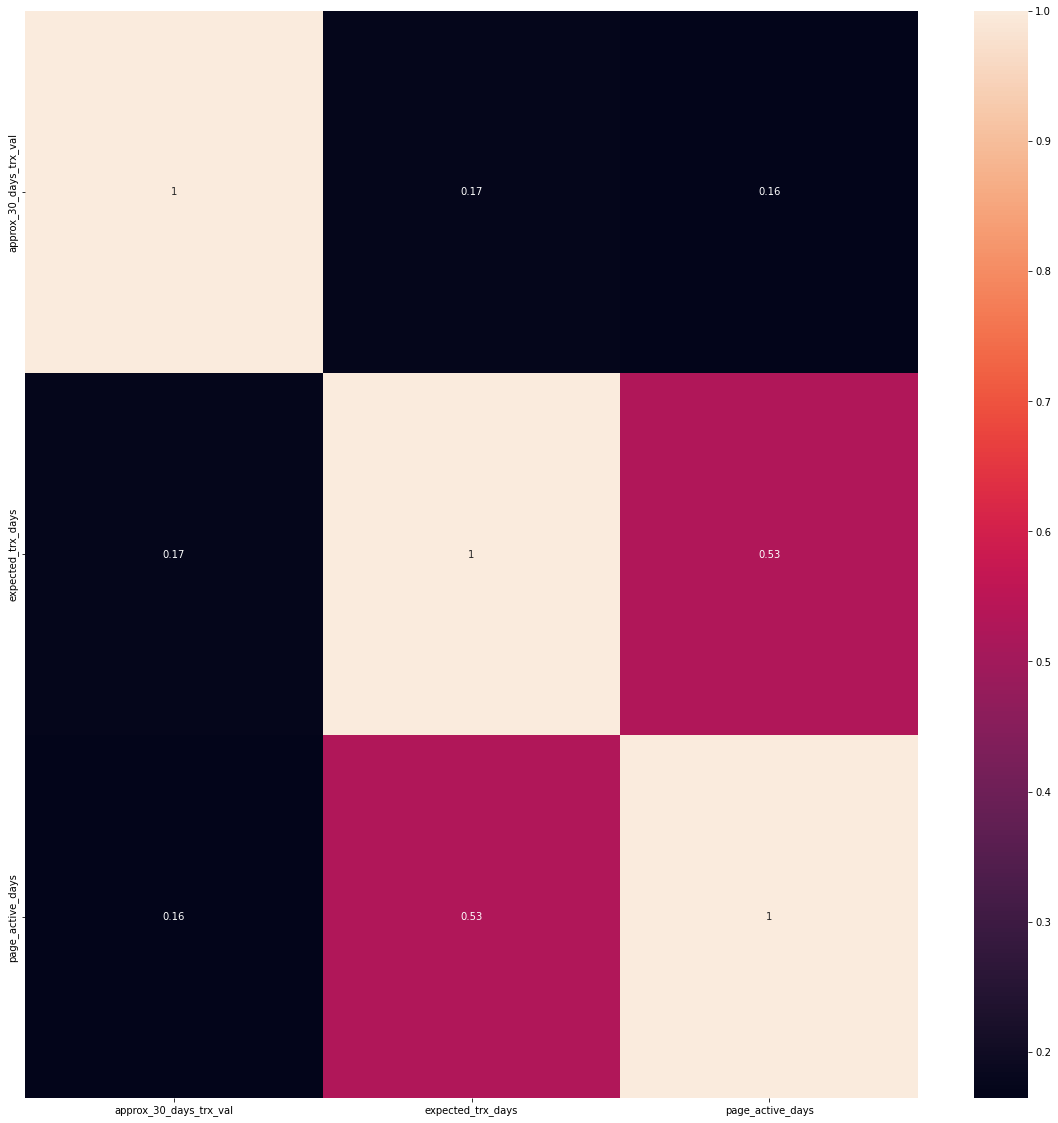

In [148]:
#Correlation analysis
correlations = summaries.corr()

f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

In [149]:
from sklearn.preprocessing import StandardScaler, normalize
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import joblib
import pyarrow as pa

In [150]:
# Let's scale the data first
scaler = StandardScaler()
summaries_scaled = scaler.fit_transform(summaries)

In [151]:
summaries_scaled.shape

(69086, 3)

In [152]:
summaries_scaled

array([[-0.30148083,  0.59268586, -0.84152137],
       [-0.33533565, -0.88064963, -1.50286155],
       [ 2.52819037,  0.59268586,  0.73309813],
       ...,
       [-0.32403806, -1.8014843 ,  0.73309813],
       [-0.32291876,  0.50060239, -0.02271923],
       [ 0.22190062,  0.50060239,  0.29220467]])

In [153]:
scores_1 = []

range_values = range(1, 10)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(summaries_scaled)
    scores_1.append(kmeans.inertia_)

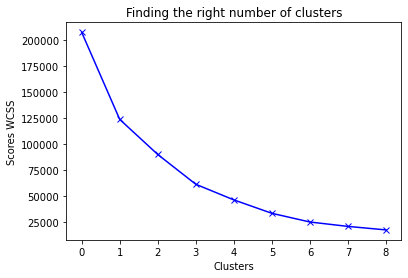

In [154]:
plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()

In [155]:
summaries_scaled

array([[-0.30148083,  0.59268586, -0.84152137],
       [-0.33533565, -0.88064963, -1.50286155],
       [ 2.52819037,  0.59268586,  0.73309813],
       ...,
       [-0.32403806, -1.8014843 ,  0.73309813],
       [-0.32291876,  0.50060239, -0.02271923],
       [ 0.22190062,  0.50060239,  0.29220467]])

In [156]:
# Initialize the KMeans model
kmeans = KMeans(4)

# Fit the model to the dataframe
kmeans.fit(summaries_scaled)

# Get the cluster labels for each row in the dataframe
# labels = kmeans.predict(summaries_scaled)

# Add the labels as a new column to the dataframe
# summaries_scaled['cluster'] = labels

# summaries_scaled.head()

KMeans(n_clusters=4)

In [157]:
labels = kmeans.labels_

In [158]:
kmeans.cluster_centers_.shape

(4, 3)

In [159]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [summaries.columns])
# cluster_centers = cluster_centers.set_index('store_number')

cluster_centers 

,approx_30_days_trx_val,expected_trx_days,page_active_days
0,0.000,0.520,0.349
1,-0.299,-1.356,-2.017
2,6.564,0.569,0.595
3,-0.298,-1.862,0.621


In [160]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [summaries.columns])
cluster_centers


,approx_30_days_trx_val,expected_trx_days,page_active_days
0,122550.762,29.211,0.878
1,14926.666,8.842,0.127
2,2485765.167,29.741,0.956
3,15239.748,3.348,0.964


In [161]:
cluster_centers.columns

MultiIndex([('approx_30_days_trx_val',),
            (     'expected_trx_days',),
            (      'page_active_days',)],
           )

In [162]:
# Labels associated to each data point
print(labels.shape)
print(labels.max())
print(labels.min())

(69086,)
3
0


In [163]:
pd.DataFrame({'cluster':labels})

,cluster
0,0
1,1
2,0
3,0
4,0
...,...
69081,0
69082,0
69083,3
69084,0


In [164]:
# concatenate the clusters labels to our original dataframe
df_cluster = pd.concat([store_number, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster = pd.concat([summaries, df_cluster], axis = 1)
df_cluster.head()

,approx_30_days_trx_val,expected_trx_days,page_active_days,store_number,loan_count,due_date_rm_ge_rm_add_back,rllvr_date_rm_ge_rm_add_back,max_global_limit,final_21_limit,final_7_limit,final_1_limit,previous_max_global_limit,idm_recommendation,cluster
0,13921.667,30,0.500,786152,0.000,0,0,0,0,0,0,0,Approve,0
1,1732.333,14,0.290,772757,0.000,0,0,0,0,0,0,0,Approve,1
2,1032737.153,30,1.000,165978,0.000,0,0,0,0,0,0,0,Approve,0
3,217294.817,30,1.000,745142,0.000,0,0,0,0,0,0,0,Reject,0
4,524513.423,30,1.000,510261,0.000,0,0,0,0,0,0,0,Approve,0


In [165]:
df_cluster.shape

(69086, 14)

In [166]:
# # Save the model to a file
# joblib.dump(kmeans, 'kmeans_model.joblib')

# # Load the model from joblib file
# loaded_model = joblib.load('kmeans_model.joblib')

# # Convert the dataframe and the model to a parquet file
# table = pa.Table.from_pandas(df_cluster)
# model_parquet = pa.parquet.write_table(table, 'kmeans_model_data.parquet')


# # You can later load the model using:
# # loaded_model_parquet = pa.parquet.read_table('kmeans_model.parquet').to_pydict()

In [167]:
# # Save the model to a file
# joblib.dump(kmeans, 'cluster_model.joblib')

# # Load the model from joblib file
# loaded_cluster_model = joblib.load('cluster_model.joblib')

In [168]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69086 entries, 0 to 69085
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   approx_30_days_trx_val        69086 non-null  float64
 1   expected_trx_days             69086 non-null  int64  
 2   page_active_days              69086 non-null  float64
 3   store_number                  69086 non-null  object 
 4   loan_count                    69086 non-null  float64
 5   due_date_rm_ge_rm_add_back    69086 non-null  int64  
 6   rllvr_date_rm_ge_rm_add_back  69086 non-null  int64  
 7   max_global_limit              69086 non-null  int64  
 8   final_21_limit                69086 non-null  int64  
 9   final_7_limit                 69086 non-null  int64  
 10  final_1_limit                 69086 non-null  int64  
 11  previous_max_global_limit     69086 non-null  int64  
 12  idm_recommendation            69086 non-null  object 
 13  c

In [169]:
df_cluster['cluster'].value_counts()

0    50854
1    11004
3     6436
2      792
Name: cluster, dtype: int64

In [170]:
# # Plot the histogram of various clusters
# for i in with_limits_s.columns:
#     plt.figure(figsize = (35, 5))
#     for j in range(5):
#         plt.subplot(1,8,j+1)
#         cluster = df_cluster[df_cluster['cluster'] == j]
#         cluster[i].hist(bins = 20)
#         plt.title('{}    \nCluster {} '.format(i,j))
#         plt.show()

In [171]:
# Obtain the principal components
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(summaries_scaled)
principal_comp

array([[-0.27076114, -0.20600716],
       [-1.69255824,  0.29792372],
       [ 1.78312183,  2.0211205 ],
       ...,
       [-0.8245683 , -0.05229375],
       [ 0.1999593 , -0.41833392],
       [ 0.60314884,  0.00738851]])

In [172]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-0.271,-0.206
1,-1.693,0.298
2,1.783,2.021
3,0.969,-0.092
4,1.276,0.704


In [173]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-0.271,-0.206,0
1,-1.693,0.298,1
2,1.783,2.021,0
3,0.969,-0.092,0
4,1.276,0.704,0


/tmp/ipykernel_16374/4149736210.py:3: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','brown'])


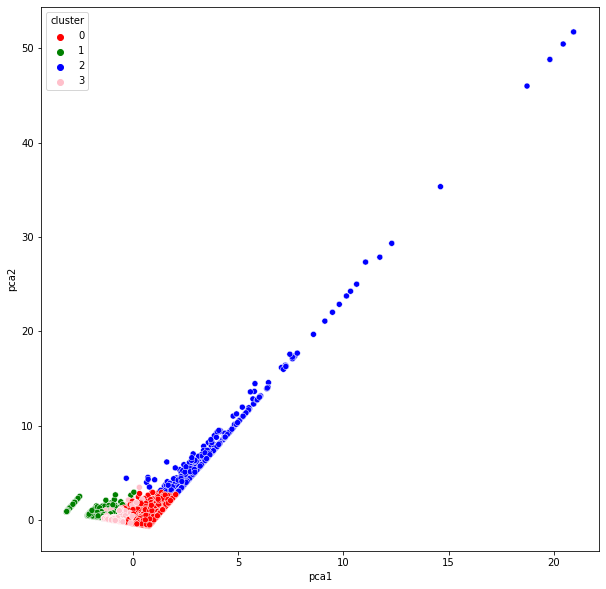

In [174]:
# Plot pca
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','brown'])
plt.show()

In [175]:
df_clusters = pd.merge(df_cluster, exp_by_dd, on='store_number', how = 'left')

df_clusters.head()

,approx_30_days_trx_val,expected_trx_days,page_active_days,store_number,loan_count,due_date_rm_ge_rm_add_back,rllvr_date_rm_ge_rm_add_back,max_global_limit,final_21_limit,final_7_limit,final_1_limit,previous_max_global_limit,idm_recommendation,cluster,repayments_by_dd_vs_principal_mean,repayments_by_erd_vs_principal_mean,repayments_by_dpd30_vs_principal_mean,repayments_by_dpd90_vs_principal_mean
0,13921.667,30,0.500,786152,0.000,0,0,0,0,0,0,0,Approve,0,NaN,NaN,NaN,NaN
1,1732.333,14,0.290,772757,0.000,0,0,0,0,0,0,0,Approve,1,NaN,NaN,NaN,NaN
2,1032737.153,30,1.000,165978,0.000,0,0,0,0,0,0,0,Approve,0,NaN,NaN,NaN,NaN
3,217294.817,30,1.000,745142,0.000,0,0,0,0,0,0,0,Reject,0,NaN,NaN,NaN,NaN
4,524513.423,30,1.000,510261,0.000,0,0,0,0,0,0,0,Approve,0,NaN,NaN,NaN,NaN


In [176]:
df_clusters['repayments_by_dd_vs_principal_mean'] = df_clusters['repayments_by_dd_vs_principal_mean'] + 0.05
df_clusters['repayments_by_erd_vs_principal_mean'] = df_clusters['repayments_by_erd_vs_principal_mean'] + 0.05
df_clusters['repayments_by_dpd30_vs_principal_mean'] = df_clusters['repayments_by_dpd30_vs_principal_mean'] + 0.05
df_clusters['repayments_by_dpd90_vs_principal_mean'] = df_clusters['repayments_by_dpd90_vs_principal_mean'] + 0.05

In [177]:
df_clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69086 entries, 0 to 69085
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   approx_30_days_trx_val                 69086 non-null  float64
 1   expected_trx_days                      69086 non-null  int64  
 2   page_active_days                       69086 non-null  float64
 3   store_number                           69086 non-null  object 
 4   loan_count                             69086 non-null  float64
 5   due_date_rm_ge_rm_add_back             69086 non-null  int64  
 6   rllvr_date_rm_ge_rm_add_back           69086 non-null  int64  
 7   max_global_limit                       69086 non-null  int64  
 8   final_21_limit                         69086 non-null  int64  
 9   final_7_limit                          69086 non-null  int64  
 10  final_1_limit                          69086 non-null  int64  
 11  pr

In [178]:
cluster_1 = df_clusters[df_clusters['cluster'] == 0]
cluster_1_with_loans = cluster_1[cluster_1['loan_count'] > 0]
cluster_1_without_loans = cluster_1[cluster_1['loan_count'] == 0]

c1_ratio_by_dd = cluster_1_with_loans['repayments_by_dd_vs_principal_mean'].mean()
c1_ratio_by_erd = cluster_1_with_loans['repayments_by_erd_vs_principal_mean'].mean()
c1_ratio_by_dpd30 = cluster_1_with_loans['repayments_by_dpd30_vs_principal_mean'].mean()
c1_ratio_by_dpd90 = cluster_1_with_loans['repayments_by_dpd90_vs_principal_mean'].mean()


cluster_1_without_loans['repayments_by_dd_vs_principal_mean'] = cluster_1_without_loans['repayments_by_dd_vs_principal_mean'].fillna(c1_ratio_by_dd)
cluster_1_without_loans['repayments_by_erd_vs_principal_mean'] = cluster_1_without_loans['repayments_by_erd_vs_principal_mean'].fillna(c1_ratio_by_erd)
cluster_1_without_loans['repayments_by_dpd30_vs_principal_mean'] = cluster_1_without_loans['repayments_by_dpd30_vs_principal_mean'].fillna(c1_ratio_by_dpd30)
cluster_1_without_loans['repayments_by_dpd90_vs_principal_mean'] = cluster_1_without_loans['repayments_by_dpd90_vs_principal_mean'].fillna(c1_ratio_by_dpd90)

cluster_1_cons = pd.concat([cluster_1_with_loans, cluster_1_without_loans], axis = 0)

cluster_1_cons[['repayments_by_dd_vs_principal_mean', 'repayments_by_erd_vs_principal_mean', 'repayments_by_dpd30_vs_principal_mean', 'repayments_by_dpd90_vs_principal_mean']].mean()

/tmp/ipykernel_16374/3750624935.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_without_loans['repayments_by_dd_vs_principal_mean'] = cluster_1_without_loans['repayments_by_dd_vs_principal_mean'].fillna(c1_ratio_by_dd)
/tmp/ipykernel_16374/3750624935.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_without_loans['repayments_by_erd_vs_principal_mean'] = cluster_1_without_loans['repayments_by_erd_vs_principal_mean'].fillna(c1_ratio_by_erd)
/tmp/ipykernel_16374/3750624935.py:13: Se

repayments_by_dd_vs_principal_mean      0.702
repayments_by_erd_vs_principal_mean     0.809
repayments_by_dpd30_vs_principal_mean   0.888
repayments_by_dpd90_vs_principal_mean   0.914
dtype: float64

In [179]:
print(c1_ratio_by_dd)
print(c1_ratio_by_erd)
print(c1_ratio_by_dpd30)
print(c1_ratio_by_dpd90)

0.7018758916955548
0.8086095594908371
0.8883911877136351
0.9137594148302092


In [180]:
cluster_1_without_loans.head()

,approx_30_days_trx_val,expected_trx_days,page_active_days,store_number,loan_count,due_date_rm_ge_rm_add_back,rllvr_date_rm_ge_rm_add_back,max_global_limit,final_21_limit,final_7_limit,final_1_limit,previous_max_global_limit,idm_recommendation,cluster,repayments_by_dd_vs_principal_mean,repayments_by_erd_vs_principal_mean,repayments_by_dpd30_vs_principal_mean,repayments_by_dpd90_vs_principal_mean
0,13921.667,30,0.500,786152,0.000,0,0,0,0,0,0,0,Approve,0,0.702,0.809,0.888,0.914
2,1032737.153,30,1.000,165978,0.000,0,0,0,0,0,0,0,Approve,0,0.702,0.809,0.888,0.914
3,217294.817,30,1.000,745142,0.000,0,0,0,0,0,0,0,Reject,0,0.702,0.809,0.888,0.914
4,524513.423,30,1.000,510261,0.000,0,0,0,0,0,0,0,Approve,0,0.702,0.809,0.888,0.914
9,455132.000,30,1.000,254486,0.000,0,0,0,0,0,0,0,Reject,0,0.702,0.809,0.888,0.914


In [181]:
cluster_2 = df_clusters[df_clusters['cluster'] == 1]
cluster_2_with_loans = cluster_2[cluster_2['loan_count'] > 0]
cluster_2_without_loans = cluster_2[cluster_2['loan_count'] == 0]

c2_ratio_by_dd = cluster_2_with_loans['repayments_by_dd_vs_principal_mean'].mean()
c2_ratio_by_erd = cluster_2_with_loans['repayments_by_erd_vs_principal_mean'].mean()
c2_ratio_by_dpd30 = cluster_2_with_loans['repayments_by_dpd30_vs_principal_mean'].mean()
c2_ratio_by_dpd90 = cluster_2_with_loans['repayments_by_dpd90_vs_principal_mean'].mean()


cluster_2_without_loans['repayments_by_dd_vs_principal_mean'] = cluster_2_without_loans['repayments_by_dd_vs_principal_mean'].fillna(c2_ratio_by_dd)
cluster_2_without_loans['repayments_by_erd_vs_principal_mean'] = cluster_2_without_loans['repayments_by_erd_vs_principal_mean'].fillna(c2_ratio_by_erd)
cluster_2_without_loans['repayments_by_dpd30_vs_principal_mean'] = cluster_2_without_loans['repayments_by_dpd30_vs_principal_mean'].fillna(c2_ratio_by_dpd30)
cluster_2_without_loans['repayments_by_dpd90_vs_principal_mean'] = cluster_2_without_loans['repayments_by_dpd90_vs_principal_mean'].fillna(c2_ratio_by_dpd90)

cluster_2_cons = pd.concat([cluster_2_with_loans, cluster_2_without_loans], axis = 0)

cluster_2_cons[['repayments_by_dd_vs_principal_mean', 'repayments_by_erd_vs_principal_mean', 'repayments_by_dpd30_vs_principal_mean', 'repayments_by_dpd90_vs_principal_mean']].mean()

/tmp/ipykernel_16374/925955535.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_2_without_loans['repayments_by_dd_vs_principal_mean'] = cluster_2_without_loans['repayments_by_dd_vs_principal_mean'].fillna(c2_ratio_by_dd)
/tmp/ipykernel_16374/925955535.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_2_without_loans['repayments_by_erd_vs_principal_mean'] = cluster_2_without_loans['repayments_by_erd_vs_principal_mean'].fillna(c2_ratio_by_erd)
/tmp/ipykernel_16374/925955535.py:13: Setti

repayments_by_dd_vs_principal_mean      0.561
repayments_by_erd_vs_principal_mean     0.650
repayments_by_dpd30_vs_principal_mean   0.739
repayments_by_dpd90_vs_principal_mean   0.777
dtype: float64

In [182]:
print(c2_ratio_by_dd)
print(c2_ratio_by_erd)
print(c2_ratio_by_dpd30)
print(c2_ratio_by_dpd90)

0.5607834552450734
0.6497089463233624
0.7393110839259796
0.7768893360472686


In [183]:
cluster_3 = df_clusters[df_clusters['cluster'] == 2]
cluster_3_with_loans = cluster_3[cluster_3['loan_count'] > 0]
cluster_3_without_loans = cluster_3[cluster_3['loan_count'] == 0]

c3_ratio_by_dd = cluster_3_with_loans['repayments_by_dd_vs_principal_mean'].mean()
c3_ratio_by_erd = cluster_3_with_loans['repayments_by_erd_vs_principal_mean'].mean()
c3_ratio_by_dpd30 = cluster_3_with_loans['repayments_by_dpd30_vs_principal_mean'].mean()
c3_ratio_by_dpd90 = cluster_3_with_loans['repayments_by_dpd90_vs_principal_mean'].mean()


cluster_3_without_loans['repayments_by_dd_vs_principal_mean'] = cluster_3_without_loans['repayments_by_dd_vs_principal_mean'].fillna(c3_ratio_by_dd)
cluster_3_without_loans['repayments_by_erd_vs_principal_mean'] = cluster_3_without_loans['repayments_by_erd_vs_principal_mean'].fillna(c3_ratio_by_erd)
cluster_3_without_loans['repayments_by_dpd30_vs_principal_mean'] = cluster_3_without_loans['repayments_by_dpd30_vs_principal_mean'].fillna(c3_ratio_by_dpd30)
cluster_3_without_loans['repayments_by_dpd90_vs_principal_mean'] = cluster_3_without_loans['repayments_by_dpd90_vs_principal_mean'].fillna(c3_ratio_by_dpd90)

cluster_3_cons = pd.concat([cluster_3_with_loans, cluster_3_without_loans], axis = 0)

cluster_3_cons[['repayments_by_dd_vs_principal_mean', 'repayments_by_erd_vs_principal_mean', 'repayments_by_dpd30_vs_principal_mean', 'repayments_by_dpd90_vs_principal_mean']].mean()

/tmp/ipykernel_16374/2009814522.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_3_without_loans['repayments_by_dd_vs_principal_mean'] = cluster_3_without_loans['repayments_by_dd_vs_principal_mean'].fillna(c3_ratio_by_dd)
/tmp/ipykernel_16374/2009814522.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_3_without_loans['repayments_by_erd_vs_principal_mean'] = cluster_3_without_loans['repayments_by_erd_vs_principal_mean'].fillna(c3_ratio_by_erd)
/tmp/ipykernel_16374/2009814522.py:13: Se

repayments_by_dd_vs_principal_mean      0.846
repayments_by_erd_vs_principal_mean     0.953
repayments_by_dpd30_vs_principal_mean   1.023
repayments_by_dpd90_vs_principal_mean   1.053
dtype: float64

In [184]:
print(c3_ratio_by_dd)
print(c3_ratio_by_erd)
print(c3_ratio_by_dpd30)
print(c3_ratio_by_dpd90)

0.8457877602643723
0.9534210257580227
1.0229978859904434
1.0531963873848733


In [185]:
cluster_4 = df_clusters[df_clusters['cluster'] == 3]
cluster_4_with_loans = cluster_4[cluster_4['loan_count'] > 0]
cluster_4_without_loans = cluster_4[cluster_4['loan_count'] == 0]

c4_ratio_by_dd = cluster_4_with_loans['repayments_by_dd_vs_principal_mean'].mean()
c4_ratio_by_erd = cluster_4_with_loans['repayments_by_erd_vs_principal_mean'].mean()
c4_ratio_by_dpd30 = cluster_4_with_loans['repayments_by_dpd30_vs_principal_mean'].mean()
c4_ratio_by_dpd90 = cluster_4_with_loans['repayments_by_dpd90_vs_principal_mean'].mean()


cluster_4_without_loans['repayments_by_dd_vs_principal_mean'] = cluster_4_without_loans['repayments_by_dd_vs_principal_mean'].fillna(c4_ratio_by_dd)
cluster_4_without_loans['repayments_by_erd_vs_principal_mean'] = cluster_4_without_loans['repayments_by_erd_vs_principal_mean'].fillna(c4_ratio_by_erd)
cluster_4_without_loans['repayments_by_dpd30_vs_principal_mean'] = cluster_4_without_loans['repayments_by_dpd30_vs_principal_mean'].fillna(c4_ratio_by_dpd30)
cluster_4_without_loans['repayments_by_dpd90_vs_principal_mean'] = cluster_4_without_loans['repayments_by_dpd90_vs_principal_mean'].fillna(c4_ratio_by_dpd90)

cluster_4_cons = pd.concat([cluster_4_with_loans, cluster_4_without_loans], axis = 0)

cluster_4_cons[['repayments_by_dd_vs_principal_mean', 'repayments_by_erd_vs_principal_mean', 'repayments_by_dpd30_vs_principal_mean', 'repayments_by_dpd90_vs_principal_mean']].mean()

/tmp/ipykernel_16374/2183394851.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_4_without_loans['repayments_by_dd_vs_principal_mean'] = cluster_4_without_loans['repayments_by_dd_vs_principal_mean'].fillna(c4_ratio_by_dd)
/tmp/ipykernel_16374/2183394851.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_4_without_loans['repayments_by_erd_vs_principal_mean'] = cluster_4_without_loans['repayments_by_erd_vs_principal_mean'].fillna(c4_ratio_by_erd)
/tmp/ipykernel_16374/2183394851.py:13: Se

repayments_by_dd_vs_principal_mean      0.545
repayments_by_erd_vs_principal_mean     0.632
repayments_by_dpd30_vs_principal_mean   0.718
repayments_by_dpd90_vs_principal_mean   0.766
dtype: float64

In [186]:
print(c4_ratio_by_dd)
print(c4_ratio_by_erd)
print(c4_ratio_by_dpd30)
print(c4_ratio_by_dpd90)

0.5448670397647141
0.6320978042428543
0.7176195445314949
0.7657208957257847


In [187]:
cluster_5 = df_clusters[df_clusters['cluster'] == 4]
cluster_5_with_loans = cluster_5[cluster_5['loan_count'] > 0]
cluster_5_without_loans = cluster_5[cluster_5['loan_count'] == 0]

c5_ratio_by_dd = cluster_5_with_loans['repayments_by_dd_vs_principal_mean'].mean()
c5_ratio_by_erd = cluster_5_with_loans['repayments_by_erd_vs_principal_mean'].mean()
c5_ratio_by_dpd30 = cluster_5_with_loans['repayments_by_dpd30_vs_principal_mean'].mean()
c5_ratio_by_dpd90 = cluster_5_with_loans['repayments_by_dpd90_vs_principal_mean'].mean()


cluster_5_without_loans['repayments_by_dd_vs_principal_mean'] = cluster_5_without_loans['repayments_by_dd_vs_principal_mean'].fillna(c5_ratio_by_dd)
cluster_5_without_loans['repayments_by_erd_vs_principal_mean'] = cluster_5_without_loans['repayments_by_erd_vs_principal_mean'].fillna(c5_ratio_by_erd)
cluster_5_without_loans['repayments_by_dpd30_vs_principal_mean'] = cluster_5_without_loans['repayments_by_dpd30_vs_principal_mean'].fillna(c5_ratio_by_dpd30)
cluster_5_without_loans['repayments_by_dpd90_vs_principal_mean'] = cluster_5_without_loans['repayments_by_dpd90_vs_principal_mean'].fillna(c5_ratio_by_dpd90)

cluster_5_cons = pd.concat([cluster_5_with_loans, cluster_5_without_loans], axis = 0)

cluster_5_cons[['repayments_by_dd_vs_principal_mean', 'repayments_by_erd_vs_principal_mean', 'repayments_by_dpd30_vs_principal_mean', 'repayments_by_dpd90_vs_principal_mean']].mean()

repayments_by_dd_vs_principal_mean      NaN
repayments_by_erd_vs_principal_mean     NaN
repayments_by_dpd30_vs_principal_mean   NaN
repayments_by_dpd90_vs_principal_mean   NaN
dtype: float64

In [188]:
print(c5_ratio_by_dd)
print(c5_ratio_by_erd)
print(c5_ratio_by_dpd30)
print(c5_ratio_by_dpd90)

nan
nan
nan
nan


In [189]:
df = pd.concat([cluster_1_cons, cluster_2_cons, cluster_3_cons, cluster_4_cons], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69086 entries, 9071 to 69083
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   approx_30_days_trx_val                 69086 non-null  float64
 1   expected_trx_days                      69086 non-null  int64  
 2   page_active_days                       69086 non-null  float64
 3   store_number                           69086 non-null  object 
 4   loan_count                             69086 non-null  float64
 5   due_date_rm_ge_rm_add_back             69086 non-null  int64  
 6   rllvr_date_rm_ge_rm_add_back           69086 non-null  int64  
 7   max_global_limit                       69086 non-null  int64  
 8   final_21_limit                         69086 non-null  int64  
 9   final_7_limit                          69086 non-null  int64  
 10  final_1_limit                          69086 non-null  int64  
 11 

In [190]:
df[['final_21_limit', 'final_7_limit', 'final_1_limit', 'max_global_limit']].sum()

final_21_limit       55208400
final_7_limit       206503600
final_1_limit        56201700
max_global_limit    224758100
dtype: int64

In [191]:
# df['repayments_by_dd_vs_principal_mean'] = df['repayments_by_dd_vs_principal_mean'] + 0.1
# df['repayments_by_erd_vs_principal_mean'] = df['repayments_by_erd_vs_principal_mean'] + 0.1
# df['repayments_by_dpd30_vs_principal_mean'] = df['repayments_by_dpd30_vs_principal_mean'] + 0.1
# df['repayments_by_dpd90_vs_principal_mean'] = df['repayments_by_dpd90_vs_principal_mean'] + 0.1

In [192]:
df[['repayments_by_dd_vs_principal_mean', 'repayments_by_erd_vs_principal_mean', 'repayments_by_dpd30_vs_principal_mean', 'repayments_by_dpd90_vs_principal_mean']].mean()

repayments_by_dd_vs_principal_mean      0.666
repayments_by_erd_vs_principal_mean     0.768
repayments_by_dpd30_vs_principal_mean   0.850
repayments_by_dpd90_vs_principal_mean   0.878
dtype: float64

In [193]:
old_with_limits = df[(df['loan_count'] > 0) & (df['max_global_limit'] > 0)]

old_with_limits.head()

,approx_30_days_trx_val,expected_trx_days,page_active_days,store_number,loan_count,due_date_rm_ge_rm_add_back,rllvr_date_rm_ge_rm_add_back,max_global_limit,final_21_limit,final_7_limit,final_1_limit,previous_max_global_limit,idm_recommendation,cluster,repayments_by_dd_vs_principal_mean,repayments_by_erd_vs_principal_mean,repayments_by_dpd30_vs_principal_mean,repayments_by_dpd90_vs_principal_mean
22873,13031.660,27,0.590,7618105,1.000,0,0,4100,0,4100,4100,4100,Reject,0,0.050,0.050,0.050,0.050
23274,483185.117,30,1.000,7237719,4.000,0,0,42100,0,42100,42100,42100,Approve,0,0.563,0.823,0.823,0.823
23389,481157.553,30,1.000,7207408,6.000,0,0,50300,50300,29000,29000,50300,Reject,0,0.634,0.917,0.917,0.917
23756,238773.917,30,0.830,7057400,2.000,0,0,52900,52900,39700,39700,52900,Approve,0,0.588,0.588,0.796,0.796
24101,25873.107,30,0.830,7053631,2.000,0,0,3500,3500,2600,2600,3500,Reject,0,0.588,0.588,0.588,0.588


In [194]:
old_with_limits[['final_21_limit', 'final_7_limit', 'final_1_limit', 'max_global_limit']].sum()

final_21_limit       55208400
final_7_limit        88871400
final_1_limit        56201700
max_global_limit    107125900
dtype: int64

In [195]:
old_with_limits[['repayments_by_dd_vs_principal_mean', 'repayments_by_erd_vs_principal_mean', 'repayments_by_dpd30_vs_principal_mean', 'repayments_by_dpd90_vs_principal_mean']].mean()

repayments_by_dd_vs_principal_mean      1.009
repayments_by_erd_vs_principal_mean     1.067
repayments_by_dpd30_vs_principal_mean   1.097
repayments_by_dpd90_vs_principal_mean   1.100
dtype: float64

In [196]:
old_with_limits_approve = old_with_limits[old_with_limits['idm_recommendation'] == 'Approve']

old_with_limits_approve[['final_21_limit', 'final_7_limit', 'final_1_limit', 'max_global_limit']].sum()

final_21_limit      38710100
final_7_limit       61133800
final_1_limit       39460000
max_global_limit    73451400
dtype: int64

In [197]:
old_with_limits_approve[['repayments_by_dd_vs_principal_mean', 'repayments_by_erd_vs_principal_mean', 'repayments_by_dpd30_vs_principal_mean', 'repayments_by_dpd90_vs_principal_mean']].mean()

repayments_by_dd_vs_principal_mean      1.023
repayments_by_erd_vs_principal_mean     1.079
repayments_by_dpd30_vs_principal_mean   1.102
repayments_by_dpd90_vs_principal_mean   1.105
dtype: float64

In [198]:
old_with_limits_reject = old_with_limits[old_with_limits['idm_recommendation'] == 'Reject']

old_with_limits_reject[['final_21_limit', 'final_7_limit', 'final_1_limit', 'max_global_limit']].sum()

final_21_limit      16498300
final_7_limit       27737600
final_1_limit       16741700
max_global_limit    33674500
dtype: int64

In [199]:
old_with_limits_reject[['repayments_by_dd_vs_principal_mean', 'repayments_by_erd_vs_principal_mean', 'repayments_by_dpd30_vs_principal_mean', 'repayments_by_dpd90_vs_principal_mean']].mean()

repayments_by_dd_vs_principal_mean      0.993
repayments_by_erd_vs_principal_mean     1.051
repayments_by_dpd30_vs_principal_mean   1.089
repayments_by_dpd90_vs_principal_mean   1.091
dtype: float64

In [200]:
new_with_limits = df[(df['loan_count'] == 0) & (df['max_global_limit'] > 0)]

new_with_limits.head()

,approx_30_days_trx_val,expected_trx_days,page_active_days,store_number,loan_count,due_date_rm_ge_rm_add_back,rllvr_date_rm_ge_rm_add_back,max_global_limit,final_21_limit,final_7_limit,final_1_limit,previous_max_global_limit,idm_recommendation,cluster,repayments_by_dd_vs_principal_mean,repayments_by_erd_vs_principal_mean,repayments_by_dpd30_vs_principal_mean,repayments_by_dpd90_vs_principal_mean
43824,110498.667,30,0.770,110307,0.000,0,0,5300,0,5300,0,5300,Reject,0,0.702,0.809,0.888,0.914
43826,875494.500,30,0.900,110907,0.000,0,0,23600,0,23600,0,23600,Reject,0,0.702,0.809,0.888,0.914
43827,230549.917,30,0.700,110908,0.000,0,0,9000,0,9000,0,9000,Approve,0,0.702,0.809,0.888,0.914
43828,57103.170,30,1.000,111107,0.000,0,0,3500,0,3500,0,3500,Reject,0,0.702,0.809,0.888,0.914
43829,623623.157,30,1.000,111306,0.000,0,0,48200,0,48200,0,48200,Approve,0,0.702,0.809,0.888,0.914


In [201]:
new_with_limits['cluster'].value_counts()

0    7733
2     256
Name: cluster, dtype: int64

In [202]:
new_with_limits[['final_21_limit', 'final_7_limit', 'final_1_limit', 'max_global_limit']].sum()

final_21_limit              0
final_7_limit       117632200
final_1_limit               0
max_global_limit    117632200
dtype: int64

In [203]:
new_with_limits[['repayments_by_dd_vs_principal_mean', 'repayments_by_erd_vs_principal_mean', 'repayments_by_dpd30_vs_principal_mean', 'repayments_by_dpd90_vs_principal_mean']].mean()

repayments_by_dd_vs_principal_mean      0.706
repayments_by_erd_vs_principal_mean     0.813
repayments_by_dpd30_vs_principal_mean   0.893
repayments_by_dpd90_vs_principal_mean   0.918
dtype: float64

In [204]:
new_with_limits[['repayments_by_dd_vs_principal_mean', 'repayments_by_erd_vs_principal_mean', 'repayments_by_dpd30_vs_principal_mean', 'repayments_by_dpd90_vs_principal_mean']].describe().T

,count,mean,std,min,25%,50%,75%,max
repayments_by_dd_vs_principal_mean,7989.000,0.706,0.025,0.702,0.702,0.702,0.702,0.846
repayments_by_erd_vs_principal_mean,7989.000,0.813,0.026,0.809,0.809,0.809,0.809,0.953
repayments_by_dpd30_vs_principal_mean,7989.000,0.893,0.024,0.888,0.888,0.888,0.888,1.023
repayments_by_dpd90_vs_principal_mean,7989.000,0.918,0.025,0.914,0.914,0.914,0.914,1.053


In [205]:
new_with_limits.shape

(7989, 18)

In [206]:
new_with_limits.head()

,approx_30_days_trx_val,expected_trx_days,page_active_days,store_number,loan_count,due_date_rm_ge_rm_add_back,rllvr_date_rm_ge_rm_add_back,max_global_limit,final_21_limit,final_7_limit,final_1_limit,previous_max_global_limit,idm_recommendation,cluster,repayments_by_dd_vs_principal_mean,repayments_by_erd_vs_principal_mean,repayments_by_dpd30_vs_principal_mean,repayments_by_dpd90_vs_principal_mean
43824,110498.667,30,0.770,110307,0.000,0,0,5300,0,5300,0,5300,Reject,0,0.702,0.809,0.888,0.914
43826,875494.500,30,0.900,110907,0.000,0,0,23600,0,23600,0,23600,Reject,0,0.702,0.809,0.888,0.914
43827,230549.917,30,0.700,110908,0.000,0,0,9000,0,9000,0,9000,Approve,0,0.702,0.809,0.888,0.914
43828,57103.170,30,1.000,111107,0.000,0,0,3500,0,3500,0,3500,Reject,0,0.702,0.809,0.888,0.914
43829,623623.157,30,1.000,111306,0.000,0,0,48200,0,48200,0,48200,Approve,0,0.702,0.809,0.888,0.914


In [207]:
new_with_limits_erd = new_with_limits[new_with_limits['repayments_by_erd_vs_principal_mean'] >= 1.02]

new_with_limits_erd[['repayments_by_dd_vs_principal_mean', 'repayments_by_erd_vs_principal_mean', 'repayments_by_dpd30_vs_principal_mean', 'repayments_by_dpd90_vs_principal_mean']].mean()

repayments_by_dd_vs_principal_mean      NaN
repayments_by_erd_vs_principal_mean     NaN
repayments_by_dpd30_vs_principal_mean   NaN
repayments_by_dpd90_vs_principal_mean   NaN
dtype: float64

In [208]:
new_with_limits_erd.shape

(0, 18)

In [128]:
new_with_limits_erd[['final_21_limit', 'final_7_limit', 'final_1_limit', 'max_global_limit']].sum()

final_21_limit     0.000
final_7_limit      0.000
final_1_limit      0.000
max_global_limit   0.000
dtype: float64

In [129]:
new_with_limits_erd_approve = new_with_limits_erd[new_with_limits_erd['idm_recommendation'] == 'Approve']

new_with_limits_erd_approve[['final_21_limit', 'final_7_limit', 'final_1_limit', 'max_global_limit']].sum()

final_21_limit     0.000
final_7_limit      0.000
final_1_limit      0.000
max_global_limit   0.000
dtype: float64

In [130]:
new_with_limits_erd_approve[['repayments_by_dd_vs_principal_mean', 'repayments_by_erd_vs_principal_mean', 'repayments_by_dpd30_vs_principal_mean', 'repayments_by_dpd90_vs_principal_mean']].mean()

repayments_by_dd_vs_principal_mean      NaN
repayments_by_erd_vs_principal_mean     NaN
repayments_by_dpd30_vs_principal_mean   NaN
repayments_by_dpd90_vs_principal_mean   NaN
dtype: float64

In [131]:
new_with_limits_erd_reject = new_with_limits_erd[new_with_limits_erd['idm_recommendation'] == 'Reject']

new_with_limits_erd_reject[['final_21_limit', 'final_7_limit', 'final_1_limit', 'max_global_limit']].sum()

final_21_limit     0.000
final_7_limit      0.000
final_1_limit      0.000
max_global_limit   0.000
dtype: float64

In [ ]:
new_with_limits_erd_reject[['repayments_by_dd_vs_principal_mean', 'repayments_by_erd_vs_principal_mean', 'repayments_by_dpd30_vs_principal_mean', 'repayments_by_dpd90_vs_principal_mean']].mean()

In [ ]:
final_with_limits = pd.concat([old_with_limits, new_with_limits_erd], axis = 0)

final_with_limits.shape

In [ ]:
final_with_limits[['repayments_by_dd_vs_principal_mean', 'repayments_by_erd_vs_principal_mean', 'repayments_by_dpd30_vs_principal_mean', 'repayments_by_dpd90_vs_principal_mean']].mean()

In [ ]:
final_with_limits[['final_21_limit', 'final_7_limit', 'final_1_limit', 'max_global_limit']].sum()

In [ ]:
final_with_limits_approve = final_with_limits[final_with_limits['idm_recommendation'] == 'Approve']

final_with_limits_approve[['final_21_limit', 'final_7_limit', 'final_1_limit', 'max_global_limit']].sum()

In [ ]:
final_with_limits_approve[['repayments_by_dd_vs_principal_mean', 'repayments_by_erd_vs_principal_mean', 'repayments_by_dpd30_vs_principal_mean', 'repayments_by_dpd90_vs_principal_mean']].mean()

In [ ]:
final_with_limits_reject = final_with_limits[final_with_limits['idm_recommendation'] == 'Reject']

final_with_limits_reject[['final_21_limit', 'final_7_limit', 'final_1_limit', 'max_global_limit']].sum()

In [ ]:
final_with_limits_reject[['repayments_by_dd_vs_principal_mean', 'repayments_by_erd_vs_principal_mean', 'repayments_by_dpd30_vs_principal_mean', 'repayments_by_dpd90_vs_principal_mean']].mean()

In [ ]:
# Create a sample dataframe
data = {'cluster': [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5], 'repayment_milestone': ['dd', 'erd', 'dpd30', 'dpd90', 'dd', 'erd', 'dpd30', 'dpd90', 'dd', 'erd', 'dpd30', 'dpd90', 'dd', 'erd', 'dpd30', 'dpd90', 'dd', 'erd', 'dpd30', 'dpd90'], 'hurdle_rate': [round(c1_ratio_by_dd, 3), round(c1_ratio_by_erd, 3), round(c1_ratio_by_dpd30, 3), round(c1_ratio_by_dpd90, 3), round(c2_ratio_by_dd, 3), round(c2_ratio_by_erd, 3), round(c2_ratio_by_dpd30, 3), round(c2_ratio_by_dpd90, 3), round(c3_ratio_by_dd, 3), round(c3_ratio_by_erd, 3), round(c3_ratio_by_dpd30, 3), round(c3_ratio_by_dpd90, 3), round(c4_ratio_by_dd, 3), round(c4_ratio_by_erd, 3), round(c4_ratio_by_dpd30, 3), round(c4_ratio_by_dpd90, 3), round(c5_ratio_by_dd, 3), round(c5_ratio_by_erd, 3), round(c5_ratio_by_dpd30, 3), round(c5_ratio_by_dpd90, 3)]}
hurdle_rates_pred = pd.DataFrame(data)


In [ ]:
hurdle_rates_pred

In [ ]:
# hurdle_rates_pred.to_parquet('hurdle_rates_pred.parquet')